In [128]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.impute import KNNImputer
# Hide warnings
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import randint as sp_randint
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

## Step 1: Data Importing and Understanding

### 1.1 **Reading and getting information about the data**

In [ ]:
# Importing the data

tele_df = pd.read_csv('telecom_churn_data.csv', encoding='utf-8')

In [ ]:
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [ ]:
tele_df.shape

(99999, 226)

Now since we have read the data and found out the shape of it we could see that there are 99999 rows in the dataset and 226 columns. We will now move ahead and see about the info and the description of the datset

In [ ]:
tele_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

In [ ]:
tele_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

From the description and information about the dataset we could see that most of the datatype are of numeraical type and there are very few datatype which are of categorical or object type(12)

### 1.2 **Handling Missing Values:** 
Now our next part of the analysis is to check what proportion of the dataset are having missing values and if at all they have any missing values we would be imputing the missing values

In [ ]:
tele_df.isnull().sum()/len(tele_df)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

From the above null values we could see that the columns/features having more than 70 percent dataset follows a patterm of recharge related with 6th, 7th, 8th and 9th month, where the missing values of 6th month is 74.846748%, 7th month is 74.428744%, 8th month is 73.660737 and 9th month is 74.077741%. Let us analyse these chunks of columns

In [ ]:
first_chunk = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6',\
               'total_rech_data_7','total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',\
               'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',\
               'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [ ]:
df_recharge = tele_df[first_chunk]

In [ ]:
df_recharge.head(20)

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7/31/2014,8/23/2014,NaN,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN,NaN,2.0,3.0,NaN,NaN,0.0,0.0,NaN,NaN,177.0,69.0,NaN
9,NaN,7/23/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,154.0,NaN,NaN


From the above data head we can see that corresponding to the last recherge date having NaN value the corresponding recharge amount column is also NaN. This means that the customer have not done any recharge in that particular month. So we can move ahead and input the columns corresponding to such behaviour with 0. The unavailability of data related to any date for a particular month indicate that no recharge was done on that month. 

In [ ]:
tele_df.total_rech_data_6 = tele_df.total_rech_data_6.fillna(0)
tele_df.total_rech_data_7 = tele_df.total_rech_data_7.fillna(0)
tele_df.total_rech_data_8 = tele_df.total_rech_data_8.fillna(0)
tele_df.total_rech_data_9 = tele_df.total_rech_data_9.fillna(0)
tele_df.max_rech_data_6 = tele_df.max_rech_data_6.fillna(0)
tele_df.max_rech_data_7 = tele_df.max_rech_data_7.fillna(0)
tele_df.max_rech_data_8 = tele_df.max_rech_data_8.fillna(0)
tele_df.max_rech_data_9 = tele_df.max_rech_data_9.fillna(0)
tele_df.count_rech_2g_6 = tele_df.count_rech_2g_6.fillna(0)
tele_df.count_rech_2g_7 = tele_df.count_rech_2g_7.fillna(0)
tele_df.count_rech_2g_8 = tele_df.count_rech_2g_8.fillna(0)
tele_df.count_rech_2g_9 = tele_df.count_rech_2g_9.fillna(0)
tele_df.count_rech_3g_6 = tele_df.count_rech_3g_6.fillna(0)
tele_df.count_rech_3g_7 = tele_df.count_rech_3g_7.fillna(0)
tele_df.count_rech_3g_8 = tele_df.count_rech_3g_8.fillna(0)
tele_df.count_rech_3g_9 = tele_df.count_rech_3g_9.fillna(0)
tele_df.av_rech_amt_data_6 = tele_df.av_rech_amt_data_6.fillna(0)
tele_df.av_rech_amt_data_7 = tele_df.av_rech_amt_data_7.fillna(0)
tele_df.av_rech_amt_data_8 = tele_df.av_rech_amt_data_8.fillna(0)
tele_df.av_rech_amt_data_9 = tele_df.av_rech_amt_data_9.fillna(0)

Now we will check whether the above imputation are done correctly or not. This means all the above should now have no NaN values

In [ ]:
tele_df[['total_rech_data_6','total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',\
         'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',\
         'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','av_rech_amt_data_9']].isna().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

Let us recheck what are the other data points having null values and if anything important needed to be computed

In [ ]:
tele_df.isnull().sum()/len(tele_df)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

As the revenue characteristics of the customer will be characterized by the rechariging characteristics so we would be ignoring the feature related to average revenue per user. But however we can see some other features related to fb user and night pack user. We can move ahead and analyse them

In [ ]:
chunk_2 = tele_df[['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']]

In [ ]:
chunk_2.describe()

,fb_user_6,fb_user_7,fb_user_8,fb_user_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.914404,0.908764,0.890808,0.860968,0.025086,0.023034,0.020844,0.015971
std,0.279772,0.287950,0.311885,0.345987,0.156391,0.150014,0.142863,0.125366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above description we could see that all the values are having a max of 1 and mean of 0. So this values usually occurs when the feature is binary. Let us make it sure by checking the value counts of one fb_user feature and one night_pck_user feature

In [ ]:
chunk_2['fb_user_6'].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [ ]:
chunk_2['night_pck_user_6'].value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

So our gut feel after looking into the description was correct and these two features were binary features. Now for the missing category we can consider them to be a different category and tag them by -1 or 2. Since -1 makes dataset to be look more scaled let tag them as -1

In [ ]:
tele_df['fb_user_6'] = tele_df['fb_user_6'].fillna(-1)
tele_df['fb_user_7'] = tele_df['fb_user_7'].fillna(-1)
tele_df['fb_user_8'] = tele_df['fb_user_8'].fillna(-1)
tele_df['fb_user_9'] = tele_df['fb_user_9'].fillna(-1)
tele_df['night_pck_user_6'] = tele_df['night_pck_user_6'].fillna(-1)
tele_df['night_pck_user_7'] = tele_df['night_pck_user_7'].fillna(-1)
tele_df['night_pck_user_8'] = tele_df['night_pck_user_8'].fillna(-1)
tele_df['night_pck_user_9'] = tele_df['night_pck_user_9'].fillna(-1)

Let us now check again the null values in our dataset

In [ ]:
tele_df.isna().sum()/len(tele_df)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

Now still we could see few columns/features are having prominent amount of missing values. Let us now consider the threshold as 70% and remove all the columns having values above than this threshold of NaN values

In [ ]:
indexes = list(((tele_df.isna().sum()/tele_df.shape[0]) >0.7).index)
values = list(((tele_df.isna().sum()/tele_df.shape[0]) >0.7).values)
flag_missing_threshold_df = pd.DataFrame({'Features':indexes,'Flag':values})
filtered_columns = list(flag_missing_threshold_df[flag_missing_threshold_df['Flag']==False]['Features'].values)

In [ ]:
len(filtered_columns)

214

In [ ]:
tele_df = tele_df[filtered_columns]

So now we are left with 214 columns after performing the removal of features based on the threshold value.
We will now look into the NaN value again and analyse how much overall data will be lost if we drop the rows having less than 2% NaN values

In [ ]:
tele_df.isna().sum()/tele_df.shape[0]*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [ ]:
bool_1 = (tele_df.isna().sum()/tele_df.shape[0]) >0.0
bool_2 = (tele_df.isna().sum()/tele_df.shape[0]) <0.02
all_values= (bool_1 & bool_2)
filtered_2 = pd.DataFrame({'Features':all_values.index,'Flag':all_values.values})

In [ ]:
columns_less_than_2_per_na = list(filtered_2[filtered_2['Flag']==True]['Features'])

In [ ]:
(tele_df[columns_less_than_2_per_na].dropna().shape[0]/tele_df[columns_less_than_2_per_na].shape[0])*100

95.409954099541

We thought of dropping NaN values from those features which have less than 2% of NaN values in rows. But doing this lead to overall more than 4.5% loss of data. So we will better impute the NaN values. But before that we will be dropping of the columns related to date and id columns

In [ ]:
tele_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 214 columns):
 #   Column                Dtype  
---  ------                -----  
 0   mobile_number         int64  
 1   circle_id             int64  
 2   loc_og_t2o_mou        float64
 3   std_og_t2o_mou        float64
 4   loc_ic_t2o_mou        float64
 5   last_date_of_month_6  object 
 6   last_date_of_month_7  object 
 7   last_date_of_month_8  object 
 8   last_date_of_month_9  object 
 9   arpu_6                float64
 10  arpu_7                float64
 11  arpu_8                float64
 12  arpu_9                float64
 13  onnet_mou_6           float64
 14  onnet_mou_7           float64
 15  onnet_mou_8           float64
 16  onnet_mou_9           float64
 17  offnet_mou_6          float64
 18  offnet_mou_7          float64
 19  offnet_mou_8          float64
 20  offnet_mou_9          float64
 21  roam_ic_mou_6         float64
 22  roam_ic_mou_7         float64
 23  roam_ic_mo

In [ ]:
tele_df.shape

(99999, 214)

In [ ]:
date_and_id_columns = ['mobile_number', 'circle_id','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',\
                       'date_of_last_rech_9']

In [ ]:
tele_df = tele_df.drop(date_and_id_columns, axis=1)

In [ ]:
tele_df.shape

(99999, 204)

In [ ]:
# %%time
# if not os.path.isfile('/content/imputed_nan_data.csv'):
#   from sklearn.impute import KNNImputer
#   imputer = KNNImputer(n_neighbors=3, weights="uniform")
#   imputer.fit_transform(tele_df)
#   tele_df.to_csv('/content/imputed_nan_data.csv',index=False, encoding='utf-8')

In [ ]:
# tele_df = pd.read_csv('imputed_nan_data.csv')
# tele_df.isna().sum()/tele_df.shape[0]

### 1.3 Filter the high valued customer:

Now our next step in the analysis is to filter out the high value customer. We would be doing this by filtering out the customer who were using the services very actively in our assumed happy phase of the analysis which will be the first two month i.e 6th and the 7th month. Here we will consider the recharge done by the customer as a metric to determine the valued customer. Here the key features that will be used are **av_rech_amt_data_x**, **total_rech_data_x**, **total_rech_amt_x**. 
Here our approach will be sum up the data reacharge amount and total recharge amount by the customer to get the overall recharge done by the customer and then finding out the 70 %ile of the customer which will be our valued customer.

**We will take the data of only 6th and the 7th month to identify the valued customer**

In [ ]:
tele_df['total_data_rech_amt_6'] = tele_df['total_rech_data_6'] * tele_df['av_rech_amt_data_6']
tele_df['total_data_rech_amt_7'] = tele_df['total_rech_data_7'] * tele_df['av_rech_amt_data_7']
tele_df['total_data_rech_amt_8'] = tele_df['av_rech_amt_data_8'] * tele_df['total_rech_data_8']
tele_df['total_data_rech_amt_9'] = tele_df['av_rech_amt_data_9'] * tele_df['total_rech_data_9']

tele_df['total_amt_6'] = tele_df['total_rech_amt_6'] + tele_df['total_data_rech_amt_6']
tele_df['total_amt_7'] = tele_df['total_rech_amt_7'] + tele_df['total_data_rech_amt_7']
tele_df['total_amt_8'] = tele_df['total_rech_amt_8'] + tele_df['total_data_rech_amt_8']
tele_df['total_amt_9'] = tele_df['total_rech_amt_9'] + tele_df['total_data_rech_amt_9']

Now we will drop all the columns that was used in the above analysis

In [ ]:
tele_df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',\
              'av_rech_amt_data_9','total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9'], axis=1, inplace=True)

Since we have found our valued customer based on the 6th and the 7th month data, let us now derive a column with the amount column related to 6th and 7th month

In [ ]:
tele_df['avg_amt_6_7'] = (tele_df['total_amt_6'] + tele_df['total_amt_7'])/2

In [ ]:
tele_high_valued_df = tele_df[tele_df['avg_amt_6_7']>=np.percentile(tele_df['avg_amt_6_7'],70.0)]

In [ ]:
tele_high_valued_df.shape

(30001, 201)

### 1.4. **Imputation of missing values using KNNImputer**
KNNImputer is a class in sklearn.impute module which will use the KNN algorithm to impute the NaN or the missing values


We could have perform this imputation earlier but KNN being a weak learner it has higher time complexity. So the data which is not filtered will have comparatively higher amount of data. In addition to this we also saw that the features determining the high valued customer did not have any NaN values so during that filter also some NaN imputation were been done implicitly.
Now since the dataset is comparatively smaller it will take lesser time than the original dataset to perform KNN imputation.

In [3]:
%%time
if not os.path.isfile('/content/telecom_churn_data_high_valued_cust_imputed.csv'):
  imputer = KNNImputer(n_neighbors=3, weights="uniform")
  imputer.fit_transform(tele_high_valued_df)
  columns_data= tele_df.columns
  tele_high_valued_df = pd.DataFrame(tele_high_valued_df, columns=columns_data)
  tele_high_valued_df.to_csv('/content/telecom_churn_data_high_valued_cust_imputed.csv',index=False, encoding='utf-8')

CPU times: user 39 µs, sys: 11 µs, total: 50 µs
Wall time: 53.6 µs


In [4]:
tele_high_valued_df = pd.read_csv('/content/telecom_churn_data_high_valued_cust_imputed.csv')

In [5]:
tele_high_valued_df.isna().sum()/tele_high_valued_df.shape[0]

loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou

In [6]:
tele_high_valued_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,...,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,total_amt_6,total_amt_7,total_amt_8,total_amt_9,avg_amt_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,2.703333,13.38,0.00,4.503333,39.32,69.613333,0.00,29.546667,29.753333,18.87,0.00,9.126667,25.293333,14.88,0.00,17.486667,2.526667,2.603333,0.00,4.503333,14.206667,27.503333,0.00,4.62,0.00,6.146667,0.00,0.026667,0.0,0.0,0.00,0.00,16.736667,36.256667,0.00,9.153333,0.00,5.026667,0.00,0.000000,0.00,17.863333,0.00,7.410000,0.00,8.96,0.00,0.00,0.0,0.0,0.0,0.0,0.00,31.85,0.00,7.410000,0.0,0.00,0.00,0.000000,0.0,0.0,0.00,0.58,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,61.02,28.69,0.16,29.050000,43.38,35.043333,4.13,19.776667,2.14,3.173333,1.15,1.566667,106.543333,66.913333,5.44,50.400000,5.396667,5.33,0.00,1.040000,32.34,...,0.00,4.870000,0.00,0.00,0.00,0.110000,0.0,0.0,0.0,0.0,37.74,16.65,0.00,6.023333,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,96

**Until here we have identified our potential high valued customer, imputed NaN value. Now let us review the data and see if we have missed to drop any unwanted feature. If yes we will do that and move ahead on deriving the churn column**

So through analysis we could see that total_data_rech_amt_6, total_data_rech_amt_7, total_data_rech_amt_8 and total_data_rech_amt_9 can be dropped because we used these column to derive the total_amt_x columns.
Also we can drop total_amt_6 and total_amt_7 columns since we have derived a avg_amt_6_7 column which indicates the happy phase

In [7]:
tele_high_valued_df.drop(['total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_data_rech_amt_9'], axis=1, inplace=True)
tele_high_valued_df.shape

(30001, 197)

### 1.5 **Deriving the churn column**

Now we would be using total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 to tag the churners

In [8]:
tele_high_valued_df['is_churn'] = tele_high_valued_df['total_ic_mou_9']+tele_high_valued_df['total_og_mou_9']+tele_high_valued_df['vol_2g_mb_9']+tele_high_valued_df['vol_3g_mb_9']

In [9]:
tele_high_valued_df['is_churn'] = tele_high_valued_df['is_churn'].apply(lambda x:1 if x==0 else 0)

We have derived the churn column based on the incoming call, outgoing call and data usage of the customers and tagged the customers as churn for those having no record of such usage i.e the sum is 0.
Let us now see the distrubution of the churn customer i.e what percetage of customers are tagged as churn

In [10]:
tele_high_valued_df['is_churn'].value_counts()/tele_high_valued_df.shape[0]*100

0    91.863605
1     8.136395
Name: is_churn, dtype: float64

So we could see that approx 8.14% customers are been tagged as churned. However the dataset is highly imbalanced as majority of the customers falls in the category of non churn.

### 1.6 **Remove the columns that are associated with the 9th month**

Intersetingly while going through the columns name we were able to find that some of the columns were named with jun, jul, aug. So we will identify those column first and rename them. Then we will drop the columns which belongs to the churn month that is the 9th month

In [11]:
tele_high_valued_df.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

In [12]:
tele_high_valued_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_amt_6,total_amt_7,total_amt_8,total_amt_9,avg_amt_6_7,is_churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,2.703333,13.38,0.00,4.503333,39.32,69.613333,0.00,29.546667,29.753333,18.87,0.00,9.126667,25.293333,14.88,0.00,17.486667,2.526667,2.603333,0.00,4.503333,14.206667,27.503333,0.00,4.62,0.00,6.146667,0.00,0.026667,0.0,0.0,0.00,0.00,16.736667,36.256667,0.00,9.153333,0.00,5.026667,0.00,0.000000,0.00,17.863333,0.00,7.410000,0.00,8.96,0.00,0.00,0.0,0.0,0.0,0.0,0.00,31.85,0.00,7.410000,0.0,0.00,0.00,0.000000,0.0,0.0,0.00,0.58,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,61.02,28.69,0.16,29.050000,43.38,35.043333,4.13,19.776667,2.14,3.173333,1.15,1.566667,106.543333,66.913333,5.44,50.400000,5.396667,5.33,0.00,1.040000,32.34,11.316667,0.00,4.870000,0.00,0.00,0.00,0.110000,0.0,0.0,0.0,0.0,37.74,16.65,0.00,6.023333,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.0,3.0,2.0,6.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.40,0.00,101.20,3.58,614.0,504.0,504.0,0.0,559.0,1
1,0.0,0.0,0

In [13]:
#Dropped the columns related to the 9th month data
tele_high_valued_df=tele_high_valued_df.filter(regex='[^9]$', axis=1)

In [14]:
tele_high_valued_df.shape

(30001, 150)

### 1.7 **Derive new columns**
Here we will be using the basis of the difference in the features of revenue and usage of the 8th month and the average of the 6th and 7th month

In [15]:
#difference of average revenue per user
tele_high_valued_df['diff_arpu'] = tele_high_valued_df['arpu_8'] - ((tele_high_valued_df['arpu_6'] + tele_high_valued_df['arpu_7'])/2)
#difference of onnet minutes of usage
tele_high_valued_df['diff_onnet_mou'] = tele_high_valued_df['onnet_mou_8'] - ((tele_high_valued_df['onnet_mou_6'] + tele_high_valued_df['onnet_mou_7'])/2)
#difference of offnet minutes of usage
tele_high_valued_df['diff_offnet_mou'] = tele_high_valued_df['offnet_mou_8'] - ((tele_high_valued_df['offnet_mou_6'] + tele_high_valued_df['offnet_mou_7'])/2)
#difference of roaming incoming minutes of usage
tele_high_valued_df['diff_roam_ic_mou'] = tele_high_valued_df['roam_ic_mou_8'] - ((tele_high_valued_df['roam_ic_mou_6'] + tele_high_valued_df['roam_ic_mou_7'])/2)
#difference of roaming outgoing minutes of usage
tele_high_valued_df['diff_roam_og_mou'] = tele_high_valued_df['roam_og_mou_8'] - ((tele_high_valued_df['roam_og_mou_6'] + tele_high_valued_df['roam_og_mou_7'])/2)
#difference of local outgoing minutes of usage
tele_high_valued_df['diff_loc_og_mou'] = tele_high_valued_df['loc_og_mou_8'] - ((tele_high_valued_df['loc_og_mou_6'] + tele_high_valued_df['loc_og_mou_7'])/2)
#difference of std outgoing minutes of usage
tele_high_valued_df['diff_std_og_mou'] = tele_high_valued_df['std_og_mou_8'] - ((tele_high_valued_df['std_og_mou_6'] + tele_high_valued_df['std_og_mou_7'])/2)
#difference of isd outgoing minutes of usage
tele_high_valued_df['diff_isd_og_mou'] = tele_high_valued_df['isd_og_mou_8'] - ((tele_high_valued_df['isd_og_mou_6'] + tele_high_valued_df['isd_og_mou_7'])/2)
#difference of special outgoing minutes of usage
tele_high_valued_df['diff_spl_og_mou'] = tele_high_valued_df['spl_og_mou_8'] - ((tele_high_valued_df['spl_og_mou_6'] + tele_high_valued_df['spl_og_mou_7'])/2)
#difference of total outgoing minutes of usage
tele_high_valued_df['diff_total_og_mou'] = tele_high_valued_df['total_og_mou_8'] - ((tele_high_valued_df['total_og_mou_6'] + tele_high_valued_df['total_og_mou_7'])/2)
#difference of local incoming minutes of usage
tele_high_valued_df['diff_loc_ic_mou'] = tele_high_valued_df['loc_ic_mou_8'] - ((tele_high_valued_df['loc_ic_mou_6'] + tele_high_valued_df['loc_ic_mou_7'])/2)
#difference of std incoming minutes of usage
tele_high_valued_df['diff_std_ic_mou'] = tele_high_valued_df['std_ic_mou_8'] - ((tele_high_valued_df['std_ic_mou_6'] + tele_high_valued_df['std_ic_mou_7'])/2)
#difference of isd incoming minutes of usage
tele_high_valued_df['diff_isd_ic_mou'] = tele_high_valued_df['isd_ic_mou_8'] - ((tele_high_valued_df['isd_ic_mou_6'] + tele_high_valued_df['isd_ic_mou_7'])/2)
#difference of special incoming minutes of usage
tele_high_valued_df['diff_spl_ic_mou'] = tele_high_valued_df['spl_ic_mou_8'] - ((tele_high_valued_df['spl_ic_mou_6'] + tele_high_valued_df['spl_ic_mou_7'])/2)
#difference of total incoming minutes of usage
tele_high_valued_df['diff_total_ic_mou'] = tele_high_valued_df['total_ic_mou_8'] - ((tele_high_valued_df['total_ic_mou_6'] + tele_high_valued_df['total_ic_mou_7'])/2)
#difference of total recharge number
tele_high_valued_df['diff_total_rech_num'] = tele_high_valued_df['total_rech_num_8'] - ((tele_high_valued_df['total_rech_num_6'] + tele_high_valued_df['total_rech_num_7'])/2)
#difference of total recharge amount
tele_high_valued_df['diff_total_rech_amt'] = tele_high_valued_df['total_amt_8'] - ((tele_high_valued_df['total_amt_6'] + tele_high_valued_df['total_amt_7'])/2)
#difference of maximum recharge amount
tele_high_valued_df['diff_max_rech_amt'] = tele_high_valued_df['max_rech_amt_8'] - ((tele_high_valued_df['max_rech_amt_6'] + tele_high_valued_df['max_rech_amt_7'])/2)
#difference of maximum recharge data
tele_high_valued_df['diff_max_rech_data'] = tele_high_valued_df['max_rech_data_8'] - ((tele_high_valued_df['max_rech_data_6'] + tele_high_valued_df['max_rech_data_7'])/2)
#difference of volume usage 2g in mb
tele_high_valued_df['diff_vol_2g_mb'] = tele_high_valued_df['vol_2g_mb_8'] - ((tele_high_valued_df['vol_2g_mb_6'] + tele_high_valued_df['vol_2g_mb_7'])/2)
#difference of volume usage 3g in mb
tele_high_valued_df['diff_vol_3g_mb'] = tele_high_valued_df['vol_3g_mb_8'] - ((tele_high_valued_df['vol_3g_mb_6'] + tele_high_valued_df['vol_3g_mb_7'])/2)

In [16]:
tele_high_valued_df.shape

(30001, 171)

## Step 3. Modeling

### 3.1. **Separating the independent feature and the dependent features**

In [17]:
y = tele_high_valued_df['is_churn']
X = tele_high_valued_df.drop('is_churn', axis=1)

### 3.2 **Scaling the features**
Scaling is the most important pre-processing task that need to done before modeling. This makes our features scale independent as all the features are brought to the same scale. We will be scaling our dataset using StandardScaler class of sklearn

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.3. **Train Test split**
Now we will be splitting our data into train data and test data so that we could train our model in the train data and test it with the test data. We will also stratify the data while splitting so that the distribution of the train set and test set are same since our dataset is an imbalanced dataset


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.75,test_size=0.25,random_state=42, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train, train_size=0.8,test_size=0.2,random_state=42, stratify=y_train)

In [20]:
print('Train Data Distribution')
print(y_train.value_counts()/y_train.shape[0])
print('*'*100)
print('*'*100)
print('Test Data Distribution')
print(y_test.value_counts()/y_test.shape[0])

Train Data Distribution
0    0.918622
1    0.081378
Name: is_churn, dtype: float64
****************************************************************************************************
****************************************************************************************************
Test Data Distribution
0    0.918678
1    0.081322
Name: is_churn, dtype: float64


In the above code snippet we cross checked whether the data was stratified correctly or not. And we can see that the data are stratified correctly

## 3.3 Data Balancing using SMOTE

Now our next step in the analysis is to balance our dataset since our dataset has a churn:non-churn ratio of approx 1:9. After we get a balanced dataset we will be training our model using imbalanced dataset and class_weight parameters.

In [21]:
#Here we are taking as ratio as 1 so that the dataset have equal number of both the created
oversample = SMOTE(random_state=12, ratio=1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [22]:
#After applying smote we will check whether the dataset is balanced or not
pd.DataFrame(y_train_smote).value_counts()

1    20669
0    20669
dtype: int64

### 3.4. **PCA**
Our first approach in the modeling would be to perform PCA. PCA will help us transform our high dimensional dataset to a relatively lower dimension ensuring that the information lost is very less and comparatively higher variance.

### 3.4.1. PCA for imbalanced datset

**PCA using imbalanced data and then balancing them using class weight while modeling in Logistic Regression**

In [23]:
pca = PCA(svd_solver='randomized', random_state=42)

In [24]:
#Fitting the PCA
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [25]:
##Printing the components of the PCA
pca.components_

array([[-8.41963626e-17,  1.11022302e-16,  5.55111512e-17, ...,
         1.75338699e-02,  1.67915280e-02,  5.90437076e-03],
       [ 5.37240191e-17, -0.00000000e+00, -3.33066907e-16, ...,
         1.49041131e-02,  7.94859596e-03,  1.48383137e-02],
       [-6.03927220e-18,  6.93889390e-17, -3.88578059e-16, ...,
         2.87529352e-02,  1.88722687e-02,  2.08909680e-02],
       ...,
       [-0.00000000e+00, -4.74983360e-01,  2.05111833e-01, ...,
         1.65367546e-02,  7.85843728e-02, -7.44576992e-02],
       [ 0.00000000e+00, -6.31035513e-03,  4.10043405e-01, ...,
        -6.72777265e-02, -3.60816420e-02, -1.99092719e-03],
       [-0.00000000e+00,  2.28891596e-02, -2.90568313e-02, ...,
         2.09021155e-02, -2.94643768e-02, -9.85575715e-02]])

In [26]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,Feature,PC1,PC2
0,loc_og_t2o_mou,-8.419636e-17,5.372402e-17
1,std_og_t2o_mou,1.110223e-16,-0.000000e+00
2,loc_ic_t2o_mou,5.551115e-17,-3.330669e-16
3,arpu_6,1.050414e-01,8.135783e-02
4,arpu_7,1.030795e-01,9.081964e-02


In [27]:
##Get the explained variance ratio of all the new principal components
pca.explained_variance_ratio_

array([9.29531686e-02, 7.67042344e-02, 5.54932625e-02, 4.43695939e-02,
       4.16334447e-02, 3.79396145e-02, 2.90608726e-02, 2.54797063e-02,
       2.39628296e-02, 2.16173988e-02, 2.05277674e-02, 2.01194259e-02,
       1.92105599e-02, 1.79251794e-02, 1.75059456e-02, 1.64104417e-02,
       1.56501144e-02, 1.52258733e-02, 1.48567620e-02, 1.43422032e-02,
       1.35003199e-02, 1.32603574e-02, 1.29314308e-02, 1.26058112e-02,
       1.22004282e-02, 1.12595659e-02, 1.09752200e-02, 1.05645633e-02,
       1.04237622e-02, 1.01610637e-02, 9.89420709e-03, 9.64093061e-03,
       9.60444348e-03, 9.18521439e-03, 8.59963061e-03, 8.47497700e-03,
       7.93401670e-03, 7.80395403e-03, 7.72585522e-03, 7.55721183e-03,
       7.29998465e-03, 7.15893556e-03, 6.84589493e-03, 6.56128378e-03,
       5.96162048e-03, 5.41596321e-03, 5.26719081e-03, 4.96706069e-03,
       4.77893999e-03, 4.63576318e-03, 4.59468557e-03, 4.48089056e-03,
       4.17620256e-03, 4.00384903e-03, 3.93230767e-03, 3.72909556e-03,
      

**Now we will get the cumulative sum of each variables of the principal componenets one by one and then plot a graph between the number of principal components and the cumsum of explained variance. After doing this we will get a vizualization on what percent of the variance is explained by how many variables**

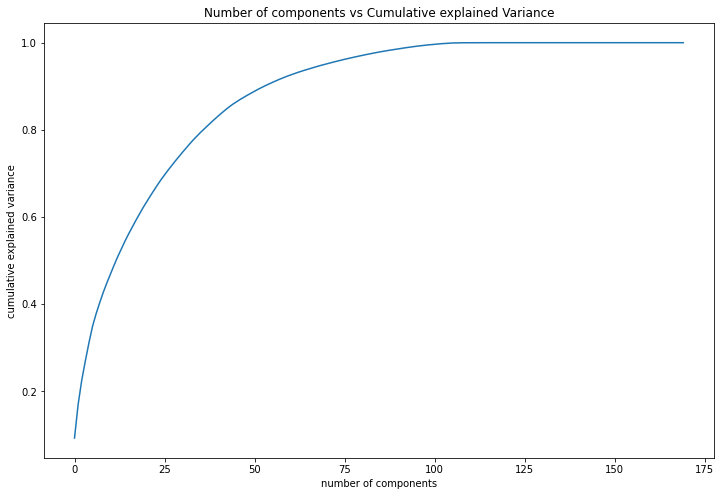

In [28]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Number of components vs Cumulative explained Variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [29]:
mapping_pca={}
for i in range(1,len(pca.explained_variance_ratio_)+1):
  mapping_pca[i]=pca.explained_variance_ratio_.cumsum()[i-1]

In [30]:
mapping_pca

{1: 0.09295316857678285,
 2: 0.16965740298156112,
 3: 0.22515066551358587,
 4: 0.2695202594565229,
 5: 0.3111537041188938,
 6: 0.34909331860008963,
 7: 0.37815419120188337,
 8: 0.4036338974599525,
 9: 0.42759672704586593,
 10: 0.44921412581490355,
 11: 0.46974189325018717,
 12: 0.489861319150563,
 13: 0.5090718790093766,
 14: 0.5269970583788536,
 15: 0.5445030039482831,
 16: 0.5609134456663696,
 17: 0.5765635601061198,
 18: 0.591789433388978,
 19: 0.6066461954183398,
 20: 0.6209883986416618,
 21: 0.6344887185373914,
 22: 0.6477490759239686,
 23: 0.6606805066968497,
 24: 0.6732863179074773,
 25: 0.6854867460639553,
 26: 0.6967463120044155,
 27: 0.7077215320536093,
 28: 0.7182860953819961,
 29: 0.7287098575856737,
 30: 0.7388709212359651,
 31: 0.7487651283251152,
 32: 0.7584060589398253,
 33: 0.7680105024203312,
 34: 0.7771957168116475,
 35: 0.7857953474248959,
 36: 0.7942703244245776,
 37: 0.8022043411198168,
 38: 0.8100082951503037,
 39: 0.8177341503708326,
 40: 0.8252913621976359,
 41

**From the above graph and the dictionary we were able to find that more than 92% of the variance is explained by top 60 principal components. So we will be using n_components as 60 in modelling.**

In [31]:
pca_final = IncrementalPCA(n_components=60)

In [32]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(22500, 60)

In [33]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(7501, 60)

### 3.3.2 PCA for SMOTE transformed data

Also we will be using the same steps involved in the SMOTE converted dataset and perform PCA on them.

In [34]:
pca_smote = PCA(svd_solver='randomized', random_state=42)

In [35]:
#Fitting the PCA
pca_smote.fit(X_train_smote)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [36]:
##Printing the components of the PCA
pca_smote.components_

array([[-8.91264994e-17,  1.11022302e-16, -0.00000000e+00, ...,
         3.52237638e-02,  2.24874044e-02,  1.81988925e-02],
       [ 1.60965456e-17,  1.38777878e-16, -1.11022302e-16, ...,
         6.10518594e-02,  4.50139573e-02,  3.81628341e-02],
       [ 4.55696321e-17,  5.55111512e-17,  3.33066907e-16, ...,
        -7.30776275e-02, -2.33824429e-02, -5.11016427e-02],
       ...,
       [-0.00000000e+00,  3.50041076e-01,  2.35767718e-01, ...,
         1.63323876e-01, -5.45027380e-02, -1.11643080e-01],
       [ 0.00000000e+00,  2.60225282e-01,  4.92169657e-03, ...,
         1.29385658e-02,  6.31975214e-03,  1.42038895e-02],
       [-0.00000000e+00, -3.71017803e-01, -1.13002737e-01, ...,
        -4.25760417e-02,  6.50667996e-03, -3.98816350e-04]])

In [37]:
colnames = list(X.columns)
pcs_df_smote = pd.DataFrame({ 'Feature':colnames,'PC1':pca_smote.components_[0],'PC2':pca_smote.components_[1]})
pcs_df_smote.head()

,Feature,PC1,PC2
0,loc_og_t2o_mou,-8.912650e-17,1.609655e-17
1,std_og_t2o_mou,1.110223e-16,1.387779e-16
2,loc_ic_t2o_mou,-0.000000e+00,-1.110223e-16
3,arpu_6,1.171207e-01,8.465696e-02
4,arpu_7,6.928124e-02,1.514896e-01


In [38]:
##Get the explained variance ratio of all the new principal components
pca_smote.explained_variance_ratio_

array([1.00407894e-01, 7.33090860e-02, 5.54252402e-02, 5.13510395e-02,
       4.94368008e-02, 4.25593940e-02, 3.44810728e-02, 3.26129536e-02,
       3.14402269e-02, 2.71764940e-02, 2.42508563e-02, 2.22248390e-02,
       2.02631082e-02, 1.68081104e-02, 1.62654216e-02, 1.55002909e-02,
       1.44222593e-02, 1.38429673e-02, 1.30395112e-02, 1.23071321e-02,
       1.20321523e-02, 1.16827245e-02, 1.10063651e-02, 1.07820737e-02,
       1.05660873e-02, 9.90394009e-03, 9.36297953e-03, 9.27696546e-03,
       8.98289258e-03, 8.75609935e-03, 8.57393179e-03, 8.56888513e-03,
       8.47904381e-03, 8.21465111e-03, 7.85894482e-03, 7.41770650e-03,
       7.15033121e-03, 6.60773766e-03, 6.55256341e-03, 6.35956051e-03,
       6.35191652e-03, 5.94143687e-03, 5.67041355e-03, 5.54682410e-03,
       5.16316828e-03, 5.09763732e-03, 4.96103548e-03, 4.85284124e-03,
       4.61298101e-03, 4.42479931e-03, 4.26320299e-03, 4.10583984e-03,
       4.07366557e-03, 3.81755716e-03, 3.53407523e-03, 3.40113491e-03,
      

**Now we will get the cumulative sum of each variables of the principal componenets one by one and then plot a graph between the number of principal components and the cumsum of explained variance. After doing this we will get a vizualization on what percent of the variance is explained by how many variables**

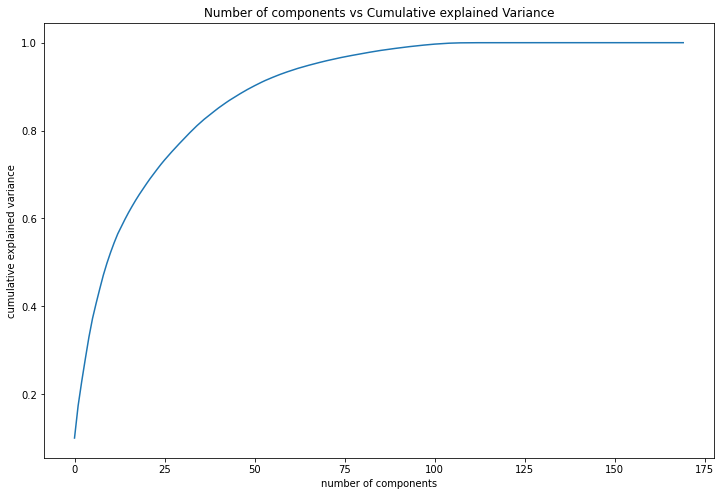

In [39]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_smote.explained_variance_ratio_))
plt.title('Number of components vs Cumulative explained Variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [40]:
mapping_pca_smote={}
for i in range(1,len(pca_smote.explained_variance_ratio_)+1):
  mapping_pca_smote[i]=pca_smote.explained_variance_ratio_.cumsum()[i-1]

In [41]:
mapping_pca_smote

{1: 0.10040789350080317,
 2: 0.17371697947017428,
 3: 0.22914221966984033,
 4: 0.28049325916456813,
 5: 0.32993005997251906,
 6: 0.3724894539595791,
 7: 0.4069705267425662,
 8: 0.43958348035488765,
 9: 0.47102370725257525,
 10: 0.498200201238332,
 11: 0.5224510575308812,
 12: 0.5446758965713007,
 13: 0.564939004798599,
 14: 0.5817471151795841,
 15: 0.5980125367513459,
 16: 0.6135128276651249,
 17: 0.627935087010389,
 18: 0.6417780543304168,
 19: 0.6548175654974577,
 20: 0.667124697630274,
 21: 0.679156849899132,
 22: 0.6908395744355785,
 23: 0.7018459395639357,
 24: 0.7126280132830495,
 25: 0.723194100595043,
 26: 0.7330980406833193,
 27: 0.7424610202142453,
 28: 0.7517379856703468,
 29: 0.760720878247422,
 30: 0.7694769775934738,
 31: 0.7780509093816488,
 32: 0.7866197945138174,
 33: 0.7950988383233887,
 34: 0.803313489434052,
 35: 0.811172434256544,
 36: 0.8185901407592595,
 37: 0.8257404719699023,
 38: 0.8323482096312199,
 39: 0.8389007730442931,
 40: 0.8452603335579931,
 41: 0.8516

**From the above graph and the dictionary we were able to find that more than 93% of the variance is explained by top 60 principal components. So we will be using n_components as 60 in modelling.**

In [42]:
pca_final_smote = IncrementalPCA(n_components=60)

In [43]:
X_train_smote_pca = pca_final_smote.fit_transform(X_train_smote)
X_train_smote_pca.shape

(41338, 60)

In [44]:
X_test_smote_pca = pca_final_smote.transform(X_test)
X_test_smote_pca.shape

(7501, 60)

Now we have transformed our imbalanced dataset as well as the SMOTE transformed dataset to the PCA dataset. We would be performing modeling using different algorithms

## 3.5. **Modeling using Logistic Regression**
Now we will apply logistic regression model on the dataset. First we will apply base Logistic Regression model without any hyperparameter tuning on both imbalanced dataset and SMOTE balanced dataset.
In case of the imbalanced datset wel will be using class_weight parameter to balance the dataset

### 3.5.1. **Logistic Regression on imbalanced dataset balaced using class weight**

In [45]:
learner_pca = LogisticRegression(class_weight={0:0.1, 1:0.9})
model_pca = learner_pca.fit(X_train_pca,y_train)

In [46]:
#We will first get the predicted probability of Churn class to get the roc-auc score
pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
print('The roc score for base model is: ')
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

The roc score for base model is: 


'0.89'

In [47]:
#We will now get the predicted accuracy of the test class and then print the confusion matrix
pred_accuracy_test = model_pca.predict(X_test_pca)[:]
confusion_matrix_base = metrics.confusion_matrix(y_test, pred_accuracy_test)

In [48]:
print('The test confusion matrix for base model is:')
confusion_matrix_base

The test confusion matrix for base model is:


array([[5826, 1065],
       [ 121,  489]])

In [49]:
print('The accuracy of the base model is')
round(metrics.accuracy_score(y_test, pred_accuracy_test),4)

The accuracy of the base model is


0.8419

In [50]:
## We will now get the sensitivity and specificity for the base model
sensitivity_pca_lr, specificity_pca_lr, support_pca_lr = sensitivity_specificity_support(y_test, pred_accuracy_test, average='binary')

In [51]:
print('The sensitivity or recall of the base model is')
round(sensitivity_pca_lr,3)

The sensitivity or recall of the base model is


0.802

In [52]:
print('The specificty or recall of the base model is')
round(specificity_pca_lr,3)

The specificty or recall of the base model is


0.845

**Results: The below are the results when default parameters are applied to a Logistic Regression using the imbalanced dataset balanced internally using class_weights**
1. Accuracy= 84.19%
2. Sensitivity/Recall = 80.2%
3. Specificity = 84.5%


### 3.5.2. **Logistic Regression on SMOTE dataset**

In [53]:
learner_pca_smote = LogisticRegression()
model_pca_smote = learner_pca_smote.fit(X_train_smote_pca,y_train_smote)

In [54]:
pred_probs_test_smote = model_pca_smote.predict_proba(X_test_smote_pca)[:,1]
print('The roc score for base model using SMOTE transformed data is: ')
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_smote))

The roc score for base model using SMOTE transformed data is: 


'0.89'

In [55]:
pred_accuracy_test_smote = model_pca_smote.predict(X_test_smote_pca)[:]
confusion_matrix_smote = metrics.confusion_matrix(y_test, pred_accuracy_test_smote)

In [56]:
confusion_matrix_smote

array([[5623, 1268],
       [ 107,  503]])

In [57]:
print('The accuracy of the logistic model using SMOTE dataset and PCA is:')
round(metrics.accuracy_score(y_test, pred_accuracy_test_smote),4)

The accuracy of the logistic model using SMOTE dataset and PCA is:


0.8167

In [58]:
sensitivity_lr_smote, specificity_lr_smote, support_lr_smote = sensitivity_specificity_support(y_test, pred_accuracy_test_smote, average='binary')

In [59]:
print('The sensitivity or recall of the logistic model using SMOTE dataset and PCA is:')
round(sensitivity_lr_smote,3)

The sensitivity or recall of the logistic model using SMOTE dataset and PCA is:


0.825

In [60]:
print('The specificty or recall of the logistic model using SMOTE dataset is')
round(sensitivity_lr_smote,3)

The specificty or recall of the logistic model using SMOTE dataset is


0.825

**Results: The below are the results when default parameters are applied to a Logistic Regression using the SMOTE dataset**
1. Accuracy= 81.67%
2. Sensitivity/Recall = 82.5%
3. Specificity = 82.5%


## Logistic Regression with Cross Validation and Hyperparameter tuning

### 3.5.3. **Logistic Regression on imbalanced dataset balaced using class weight + Hyperparameter Tuning**

**Grid Search for Accuracy**

In [62]:
%%time
lr_optimal = LogisticRegression(class_weight={0:0.1, 1: 0.9}, solver='liblinear')
parameters = {'C': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,500,1000,5000,10000],'penalty': ['l1', 'l2']}
clf_logistic_accuracy = GridSearchCV(lr_optimal, parameters, cv=4, scoring='accuracy', return_train_score=True)
clf_logistic_accuracy.fit(X_train_pca, y_train)

CPU times: user 34.7 s, sys: 13.3 s, total: 48 s
Wall time: 32.5 s


In [63]:
pd.DataFrame(clf_logistic_accuracy.cv_results_).groupby(['param_C', 'param_penalty']).max().unstack()[['mean_test_score','mean_train_score']]

mean_test_score           mean_train_score          
param_penalty              l1        l2               l1        l2
param_C                                                           
0.00001              0.918622  0.593511         0.918622  0.593393
0.00010              0.918622  0.606489         0.918622  0.606815
0.00050              0.918622  0.664178         0.918622  0.666104
0.00100              0.500311  0.704667         0.501615  0.706267
0.00500              0.749111  0.788089         0.749185  0.790252
0.01000              0.804489  0.807689         0.805970  0.810741
0.05000              0.835022  0.830000         0.836044  0.832252
0.10000              0.837644  0.833511         0.838415  0.835422
0.50000              0.837644  0.835822         0.839185  0.838148
1.00000              0.837556  0.836000         0.838963  0.838563
5.00000              0.836267  0.836178         0.838963  0.838844
10.00000             0.836267  0.836178         0.838933  0.838859
50.00000             0.836222  0.836178         0.838874  0.838874
100.00000            0.836178  0.836133         0.838889  0.838874
500.00000            0.836133  0.836133         0.838874  0.838874
1000.00000           0.836133  0.836133         0.838874  0.838874
5000.00000           0.836133  0.836133         0.838874  0.838874
10000.00000          0.836133  0.836133         0.838874  0.838874

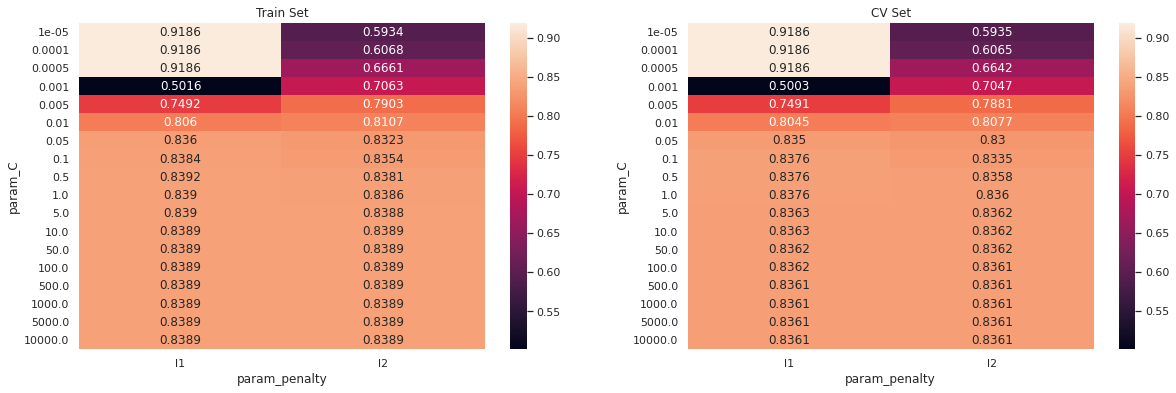

In [64]:
sns.set()
max_scores1 = pd.DataFrame(clf_logistic_accuracy.cv_results_).groupby(['param_C', 'param_penalty']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

**Grid Search for Recall**

In [61]:
%%time

lr_optimal = LogisticRegression(class_weight={0:0.1, 1: 0.9}, solver='liblinear')
parameters = {'C': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,500,1000,5000,10000],'penalty': ['l1', 'l2']}
clf_logistic_recall = GridSearchCV(lr_optimal, parameters, cv=4, scoring='recall', return_train_score=True)
clf_logistic_recall.fit(X_train_pca, y_train)

CPU times: user 36.4 s, sys: 13.9 s, total: 50.3 s
Wall time: 34 s


In [65]:
pd.DataFrame(clf_logistic_recall.cv_results_).groupby(['param_C', 'param_penalty']).max().unstack()[['mean_test_score','mean_train_score']]

mean_test_score           mean_train_score          
param_penalty              l1        l2               l1        l2
param_C                                                           
0.00001              0.000000  0.914254         0.000000  0.916075
0.00010              0.000000  0.913709         0.000000  0.916621
0.00050              0.000000  0.892411         0.000000  0.897871
0.00100              0.908803  0.877119         0.911342  0.880758
0.00500              0.836709  0.827426         0.839432  0.835610
0.01000              0.799571  0.813770         0.801749  0.823777
0.05000              0.795748  0.796839         0.796651  0.807028
0.10000              0.790284  0.794656         0.796469  0.804844
0.50000              0.790287  0.793015         0.801203  0.803570
1.00000              0.790833  0.791923         0.801749  0.803024
5.00000              0.791377  0.791377         0.802660  0.802296
10.00000             0.791377  0.791377         0.802478  0.802296
50.00000             0.791377  0.791377         0.802296  0.802296
100.00000            0.791377  0.791377         0.802296  0.802296
500.00000            0.791377  0.791377         0.802296  0.802296
1000.00000           0.791377  0.791377         0.802296  0.802296
5000.00000           0.791377  0.791377         0.802296  0.802296
10000.00000          0.791377  0.791377         0.802296  0.802296

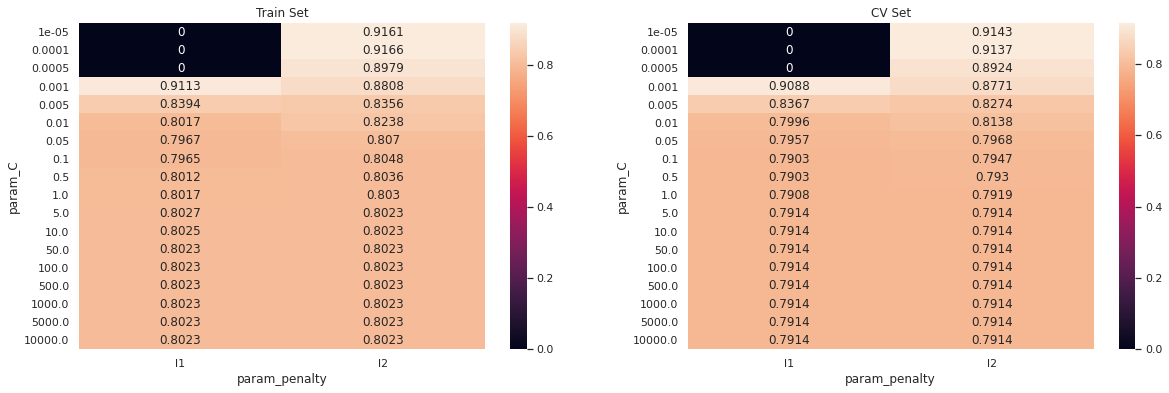

In [66]:
sns.set()
max_scores1 = pd.DataFrame(clf_logistic_recall.cv_results_).groupby(['param_C', 'param_penalty']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

**Looking into the above two observation we can see that we have to compromise on accuracy or recall to get either of the higher value. However in this case study we will consider a reasonable recall of 80+ maintaining an reasonable accuracy of same value**

Based on the above hyperparameter tuning done we will be taking the penalty as l1 and the C value as 1000. It is also observed that the scores are consistant with any value of C. So we will now move ahead and build a model on the above optimal parameters

0.8934


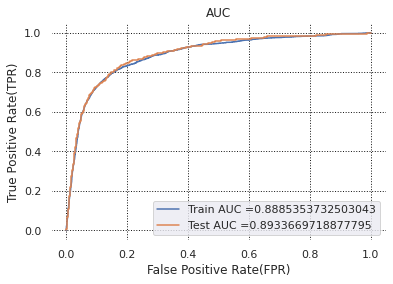

In [67]:
lr_best_model = LogisticRegression(C=0.5, penalty='l2',class_weight={0:0.1, 1: 0.9}, solver='liblinear')
lr_best_model.fit(X_train_pca, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=lr_best_model.predict_proba(X_train_pca)[:,1]

y_test_pred=lr_best_model.predict_proba(X_test_pca)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_train=auc(train_fpr, train_tpr)
auc_test=auc(test_fpr, test_tpr)
print(round(auc_test,4))

ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc_train))
ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc_test))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [68]:
print('The roc-auc score for the optimal model using class_weight-balanced')
pred_probs_test_lr_optimal = lr_best_model.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_lr_optimal))

The roc-auc score for the optimal model using class_weight-balanced


'0.89'

In [69]:
pred_accuracy_train_lr_optimal = lr_best_model.predict(X_train_pca)[:]
confusion_matrix_lr_pca_train = metrics.confusion_matrix(y_train, pred_accuracy_train_lr_optimal)

In [70]:
print('The train confusion matrix for the optimal model using class_weight-balanced')
confusion_matrix_lr_pca_train

The train confusion matrix for the optimal model using class_weight-balanced


array([[17411,  3258],
       [  361,  1470]])

In [71]:
pred_accuracy_test_lr = lr_best_model.predict(X_test_pca)[:]
confusion_matrix_lr_pca_test = metrics.confusion_matrix(y_test, pred_accuracy_test_lr)

In [72]:
print('The test confusion matrix for the optimal model using class_weight-balanced')
confusion_matrix_lr_pca_test

The test confusion matrix for the optimal model using class_weight-balanced


array([[5819, 1072],
       [ 121,  489]])

In [73]:
print('The test accuracy for the optimal model using class_weight-balanced')
round(metrics.accuracy_score(y_test, pred_accuracy_test_lr),4)

The test accuracy for the optimal model using class_weight-balanced


0.841

In [74]:
sensitivity_lr_optimal, specificity_lr_optimal, support_lr_optimal = sensitivity_specificity_support(y_test, pred_accuracy_test_lr, average='binary')

In [75]:
print('The sensitivity or recall for the optimal model using class_weight-balanced')
round(sensitivity_lr_optimal,4)

The sensitivity or recall for the optimal model using class_weight-balanced


0.8016

In [76]:
print('The specificity for the optimal model using class_weight-balanced')
round(specificity_lr_optimal,4)

The specificity for the optimal model using class_weight-balanced


0.8444

Train confusion matrix
[[17411  3258]
 [  361  1470]]


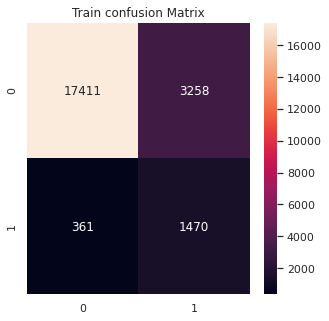

Test confusion matrix
[[5819 1072]
 [ 121  489]]


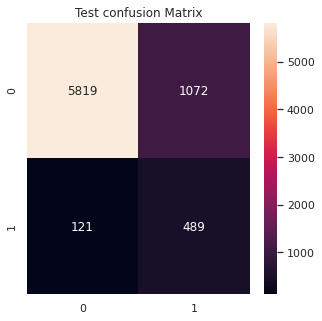

In [77]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_lr_pca_train)
sns.heatmap(pd.DataFrame(confusion_matrix_lr_pca_train),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_lr_pca_test)
sns.heatmap(pd.DataFrame(confusion_matrix_lr_pca_test),annot=True, fmt='g')
plt.show()

**Results: The below are the results hyperparameter tuning is applied to a Logistic Regression on the imbalanced dataset balnaced internally using class_weight**
1. Accuracy= 84.1%
2. Sensitivity/Recall = 80.16%
3. Specificity = 84.44%


### 3.5.4. **Logistic Regression on SMOTE dataset + Hyperparameter Tuning**

In [78]:
%%time

lr_optimal_smote = LogisticRegression( solver='liblinear')
parameters = {'C': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,500,1000,5000,10000],'penalty': ['l1', 'l2']}
clf_logistic_smote = GridSearchCV(lr_optimal, parameters, cv=4, scoring='roc_auc', return_train_score=True)
clf_logistic_smote.fit(X_train_smote_pca, y_train_smote)

CPU times: user 40.7 s, sys: 15.4 s, total: 56.1 s
Wall time: 38 s


In [79]:
pd.DataFrame(clf_logistic_smote.cv_results_).groupby(['param_C', 'param_penalty']).max().unstack()[['mean_test_score','mean_train_score']]

mean_test_score           mean_train_score          
param_penalty              l1        l2               l1        l2
param_C                                                           
0.00001              0.500000  0.883522         0.500000  0.883930
0.00010              0.803635  0.894414         0.803660  0.894847
0.00050              0.859760  0.899113         0.860116  0.899649
0.00100              0.871141  0.899703         0.871341  0.900310
0.00500              0.888734  0.898917         0.889166  0.899735
0.01000              0.893764  0.898158         0.894266  0.899052
0.05000              0.897445  0.896958         0.898198  0.897929
0.10000              0.897185  0.896746         0.898018  0.897722
0.50000              0.896699  0.896567         0.897646  0.897540
1.00000              0.896598  0.896542         0.897568  0.897516
5.00000              0.896534  0.896520         0.897510  0.897498
10.00000             0.896523  0.896517         0.897500  0.897495
50.00000             0.896514  0.896515         0.897492  0.897494
100.00000            0.896514  0.896515         0.897492  0.897493
500.00000            0.896513  0.896515         0.897491  0.897493
1000.00000           0.896514  0.896515         0.897491  0.897493
5000.00000           0.896512  0.896515         0.897491  0.897493
10000.00000          0.896513  0.896515         0.897490  0.897493

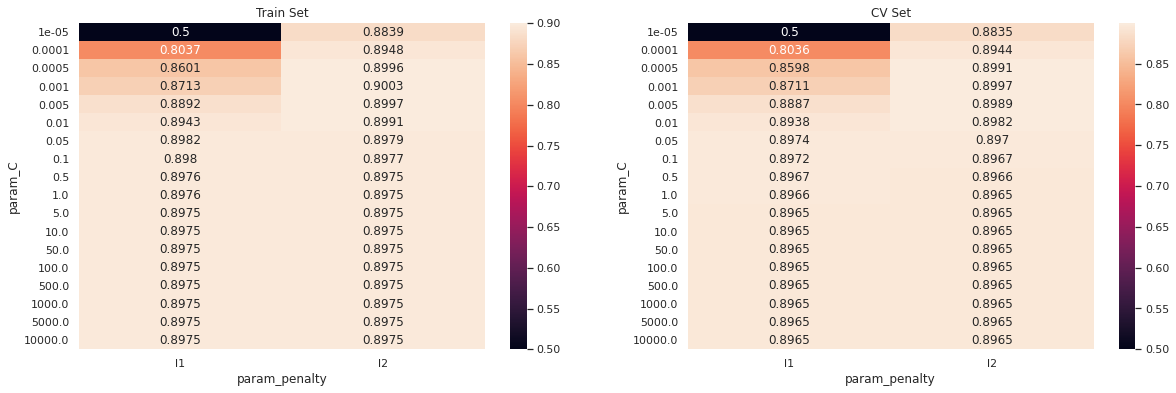

In [80]:
sns.set()
max_scores1 = pd.DataFrame(clf_logistic_smote.cv_results_).groupby(['param_C', 'param_penalty']).max().unstack()[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

Based on the above hyperparameter tuning done we will be taking the penalty as l1 and the C value as 0.001. It is also observed that the scores are consistant with any value of C. So we will now move ahead and build a model on the above optimal parameters

0.8934


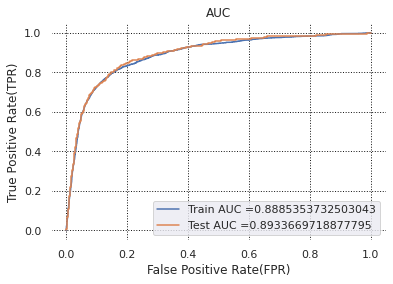

In [117]:
lr_best_model_smote = LogisticRegression(C=0.001, penalty='l2', solver='liblinear')
lr_best_model_smote.fit(X_train_smote_pca, y_train_smote)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_smote_lr=lr_best_model_smote.predict_proba(X_train_pca)[:,1]

y_test_pred_smote_lr=lr_best_model_smote.predict_proba(X_test_pca)[:,1]

train_fpr_smote_lr, train_tpr_smote_lr, tr_thresholds_smote_lr = roc_curve(y_train, y_train_pred)
test_fpr_smote_lr, test_tpr_smote_lr, te_thresholds_smote_lr = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_train_lr_smote=auc(train_fpr_smote_lr, train_tpr_smote_lr)
auc_test_lr_smote=auc(test_fpr_smote_lr, test_tpr_smote_lr)
print(round(auc_test_lr_smote,4))

ax.plot(train_fpr_smote_lr, train_tpr_smote_lr, label="Train AUC ="+str(auc_train))
ax.plot(test_fpr_smote_lr, test_tpr_smote_lr, label="Test AUC ="+str(auc_test))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [118]:
print('The roc-auc score for the optimal model using class_weight-balanced')
pred_probs_test_lr_smote_optimal = lr_best_model_smote.predict_proba(X_test_smote_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_lr_smote_optimal))

The roc-auc score for the optimal model using class_weight-balanced


'0.89'

In [119]:
pred_accuracy_train_lr_optimal_smote = lr_best_model_smote.predict(X_train_smote_pca)[:]
confusion_matrix_lr_pca_train_smote = metrics.confusion_matrix(y_train_smote, pred_accuracy_train_lr_optimal_smote)

In [120]:
print('The train confusion matrix for the optimal model using SMOTE dataset')
confusion_matrix_lr_pca_train_smote

The train confusion matrix for the optimal model using SMOTE dataset


array([[16688,  3981],
       [ 3101, 17568]])

In [132]:
pred_accuracy_test_lr_smote = lr_best_model_smote.predict(X_test_smote_pca)[:]
confusion_matrix_lr_pca_test_smote = metrics.confusion_matrix(y_test, pred_accuracy_test_lr_smote)

In [133]:
print('The test confusion matrix for the optimal model using SMOTE')
confusion_matrix_lr_pca_test_smote

The test confusion matrix for the optimal model using SMOTE


array([[5585, 1306],
       [ 106,  504]])

In [134]:
print('The accuracy for the optimal model using SMOTE')
round(metrics.accuracy_score(y_test, pred_accuracy_test_lr_smote),4)

The accuracy for the optimal model using SMOTE


0.8118

In [135]:
sensitivity_lr_optimal_smote, specificity_lr_optimal_smote, support_lr_optimal_smote = sensitivity_specificity_support(y_test, \
                                                                                        pred_accuracy_test_lr_smote, average='binary')

In [136]:
print('The sensitivity or recall for the optimal model using class_weight-balanced')
round(sensitivity_lr_optimal_smote,4)

The sensitivity or recall for the optimal model using class_weight-balanced


0.8262

In [126]:
print('The specificity for the optimal model using class_weight-balanced')
round(specificity_lr_optimal_smote,4)

The specificity for the optimal model using class_weight-balanced


0.8105

Train confusion matrix
[[17411  3258]
 [  361  1470]]


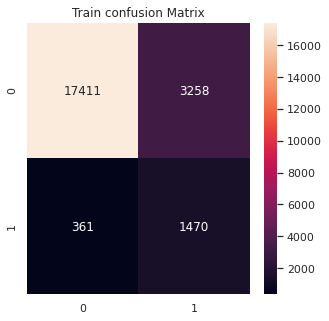

Test confusion matrix
[[5585 1306]
 [ 106  504]]


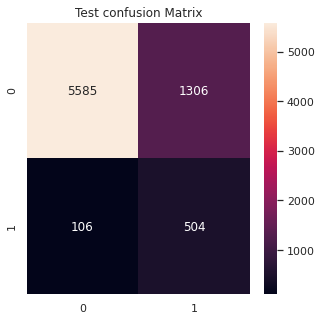

In [127]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_lr_pca_train_smote)
sns.heatmap(pd.DataFrame(confusion_matrix_lr_pca_train_smote),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_lr_pca_test_smote)
sns.heatmap(pd.DataFrame(confusion_matrix_lr_pca_test_smote),annot=True, fmt='g')
plt.show()

**Results: The below are the results when hypertuned parameters are applied to a Logistic Regression using the SMOTE dataset**
1. Accuracy= 81.18%
2. Sensitivity/Recall = 82.62%
3. Specificity = 81.05%


## 3.6 **Modeling Using GBDT**
Here we would be using LGBMClassifier of the lightgbm package as it is relatively fast in training the Gradient Boosted model. Here we will be using only the SMOTE dataset to build the model. First we will use GridSearchCV to perform the cross validation task and then we will find out the best hyperparameter from the Grid Search CV out of n_estimators and max_depth. And then finally build a model. Taking in mind the time constraint we are taking these two hyperparameters. However we can also try with othere hyperparameters also.

In [121]:
%%time
gbdt = LGBMClassifier()
grid_params = {'n_estimators': [5, 10, 50, 100, 150, 200, 250], 'max_depth':range(1,20,2)}
clf_gbdt = GridSearchCV(gbdt, grid_params ,cv=4, scoring='roc_auc',n_jobs=-1,return_train_score=True)
clf_gbdt.fit(X_train_smote, y_train_smote)

CPU times: user 24.9 s, sys: 255 ms, total: 25.2 s
Wall time: 23min 1s


In [122]:
pd.DataFrame(clf_gbdt.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

mean_test_score                                          \
param_max_depth                 1         3         5         7         9    
param_n_estimators                                                           
5                         0.909857  0.933841  0.953259  0.953022  0.952942   
10                        0.918304  0.940202  0.959122  0.960971  0.961057   
50                        0.943411  0.971371  0.984611  0.987180  0.988189   
100                       0.954271  0.981085  0.991049  0.992742  0.992993   
150                       0.959891  0.986212  0.993083  0.994069  0.993990   
200                       0.963632  0.988692  0.993979  0.994561  0.994419   
250                       0.966151  0.990083  0.994471  0.994917  0.994710   

                                                                      \
param_max_depth           11        13        15        17        19   
param_n_estimators                                                     
5                   0.952942  0.952942  0.952942  0.952942  0.952942   
10                  0.961057  0.961057  0.961057  0.961057  0.961057   
50                  0.988505  0.988290  0.988336  0.988404  0.988404   
100                 0.993077  0.993035  0.992937  0.993096  0.992954   
150                 0.994060  0.993996  0.994081  0.994036  0.993938   
200                 0.994417  0.994328  0.994490  0.994383  0.994401   
250                 0.994637  0.994541  0.994793  0.994615  0.994573   

                   mean_train_score                                          \
param_max_depth                  1         3         5         7         9    
param_n_estimators                                                            
5                          0.910252  0.934981  0.957095  0.957304  0.957451   
10                         0.918647  0.942308  0.963488  0.965267  0.965466   
50                         0.944257  0.974166  0.989939  0.992551  0.993259   
100                        0.955433  0.984814  0.996589  0.998163  0.998373   
150                        0.961349  0.990372  0.998417  0.999417  0.999532   
200                        0.965229  0.993236  0.999169  0.999835  0.999903   
250                        0.967889  0.994844  0.999600  0.999971  0.999990   

                                                                      
param_max_depth           11        13        15        17        19  
param_n_estimators                                                    
5                   0.957451  0.957451  0.957451  0.957451  0.957451  
10                  0.965466  0.965466  0.965466  0.965466  0.965466  
50                  0.993391  0.993350  0.993364  0.993375  0.993375  
100                 0.998407  0.998439  0.998435  0.998412  0.998414  
150                 0.999581  0.999578  0.999594  0.999571  0.999592  
200                 0.999922  0.999923  0.999928  0.999925  0.999926  
250                 0.999993  0.999992  0.999992  0.999993  0.999993

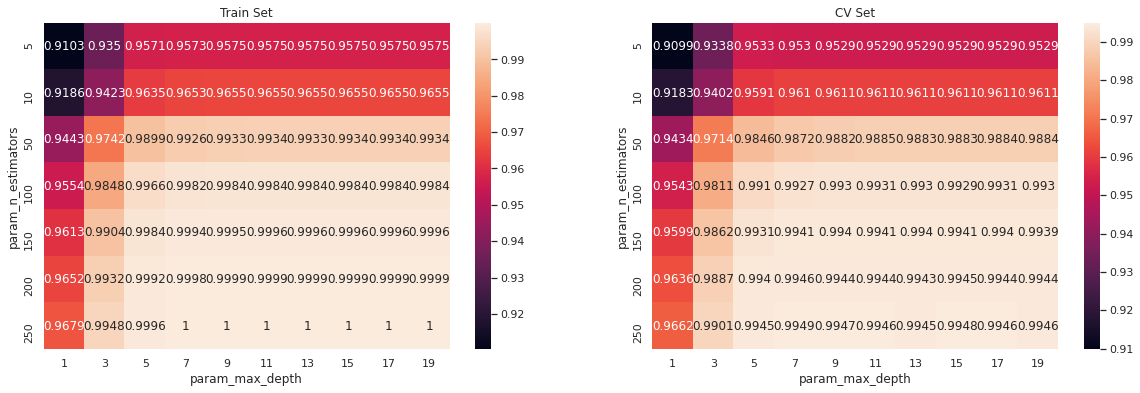

In [123]:
import seaborn as sns; 
sns.set()
max_scores1 = pd.DataFrame(clf_gbdt.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

0.9034


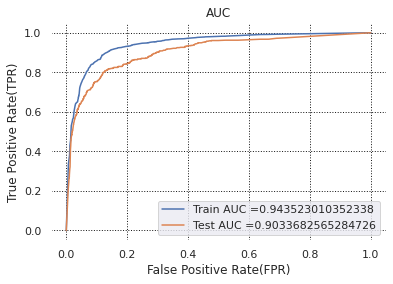

In [131]:
gbdt_bestModel = LGBMClassifier(max_depth=3, n_estimators=100,learning_rate=0.01)
gbdt_bestModel.fit(X_train_smote, y_train_smote)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_gbdt=gbdt_bestModel.predict_proba(X_train_smote)[:,1]

y_test_pred_gbdt=gbdt_bestModel.predict_proba(X_test)[:,1]

train_fpr_gbdt, train_tpr_gbdt, tr_thresholds_gbdt = roc_curve(y_train_smote, y_train_pred_gbdt)
test_fpr_gbdt, test_tpr_gbdt, te_thresholds_gbdt = roc_curve(y_test, y_test_pred_gbdt)

ax = plt.subplot()

auc_train_gbdt=auc(train_fpr_gbdt, train_tpr_gbdt)
auc_test_gbdt=auc(test_fpr_gbdt, test_tpr_gbdt)
print(round(auc_test_gbdt,4))

ax.plot(train_fpr_gbdt, train_tpr_gbdt, label="Train AUC ="+str(auc_train_gbdt))
ax.plot(test_fpr_gbdt, test_tpr_gbdt, label="Test AUC ="+str(auc_test_gbdt))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [177]:
print('The roc-auc score for the optimal GBDT model is:')
pred_probs_test_gbdt = gbdt_bestModel.predict_proba(X_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_gbdt))

The roc-auc score for the optimal GBDT model is:


'0.9'

In [178]:
print('The train confusion matrix for the optimal GBDT model is:')
pred_accuracy_test_gbdt = gbdt_bestModel.predict(X_test)[:]
confusion_matrix_gbdt_test = metrics.confusion_matrix(y_test, pred_accuracy_test_gbdt)

The train confusion matrix for the optimal GBDT model is:


In [179]:
print('The test confusion matrix for the optimal GBDT model is:')

confusion_matrix_gbdt_test

The test confusion matrix for the optimal GBDT model is:


array([[6020,  871],
       [ 119,  491]])

In [180]:
print('The accuracy score for the optimal GBDT model is:')
metrics.accuracy_score(y_test, pred_accuracy_test_gbdt)

The accuracy score for the optimal GBDT model is:


0.8680175976536462

In [181]:
sensitivity_gbdt, specificity_gbdt, support_gbdt = sensitivity_specificity_support(y_test, pred_accuracy_test_gbdt, average='binary')

In [182]:
print('The sensitivity/recall for the optimal GBDT model is:')
round(sensitivity_gbdt,4)

The sensitivity/recall for the optimal GBDT model is:


0.8049

In [183]:
print('The specificity for the optimal GBDT model is:')
round(specificity_gbdt,4)

The specificity for the optimal GBDT model is:


0.8736

In [185]:
pred_accuracy_train_gbdt = gbdt_bestModel.predict(X_train_smote)[:]
print('The train confusion matrix for the optimal GBDT model is:')
confusion_matrix_gbdt_train = metrics.confusion_matrix(y_train_smote, pred_accuracy_train_gbdt)
confusion_matrix_gbdt_train

The train confusion matrix for the optimal GBDT model is:


array([[18040,  2629],
       [ 2152, 18517]])

Train confusion matrix
[[18040  2629]
 [ 2152 18517]]


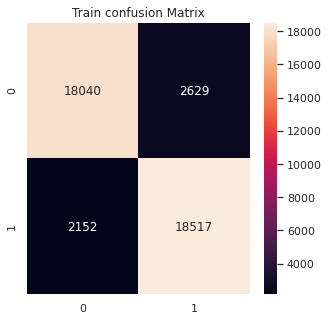

Test confusion matrix
[[6020  871]
 [ 119  491]]


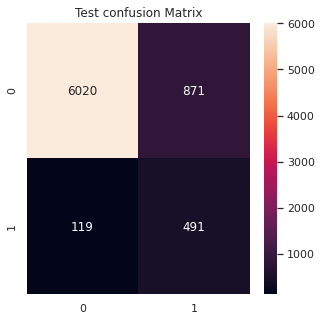

In [186]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_gbdt_train)
sns.heatmap(pd.DataFrame(confusion_matrix_gbdt_train),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_gbdt_test)
sns.heatmap(pd.DataFrame(confusion_matrix_gbdt_test),annot=True, fmt='g')
plt.show()

**Top 20 Features GBDT:**
Now we will find out which of the features are having very high contribution on the model

In [141]:
important_features_gbdt=gbdt_bestModel.feature_importances_

In [142]:
mapping_feature_importance_gbdt={}
for i,j in enumerate(X.columns):
  if(important_features_gbdt[i]!=0.0):
    mapping_feature_importance_gbdt[j]=round(important_features_gbdt[i],4)

In [143]:
print('The top 20 features and their respecteive contribution in percentage are:')
top_20_features_gbdt = sorted(mapping_feature_importance_gbdt.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_features_gbdt

The top 20 features and their respecteive contribution in percentage are:


[('roam_og_mou_8', 129),
 ('total_ic_mou_8', 129),
 ('total_amt_8', 63),
 ('fb_user_8', 55),
 ('total_og_mou_8', 44),
 ('diff_total_ic_mou', 43),
 ('last_day_rch_amt_8', 40),
 ('roam_ic_mou_8', 39),
 ('night_pck_user_8', 26),
 ('loc_ic_t2f_mou_8', 25),
 ('diff_total_rech_num', 23),
 ('onnet_mou_8', 20),
 ('loc_og_t2t_mou_8', 11),
 ('total_ic_mou_7', 11),
 ('std_ic_t2m_mou_6', 10),
 ('loc_ic_mou_8', 8),
 ('diff_arpu', 7),
 ('spl_og_mou_7', 3),
 ('spl_og_mou_8', 3),
 ('total_ic_mou_6', 3)]

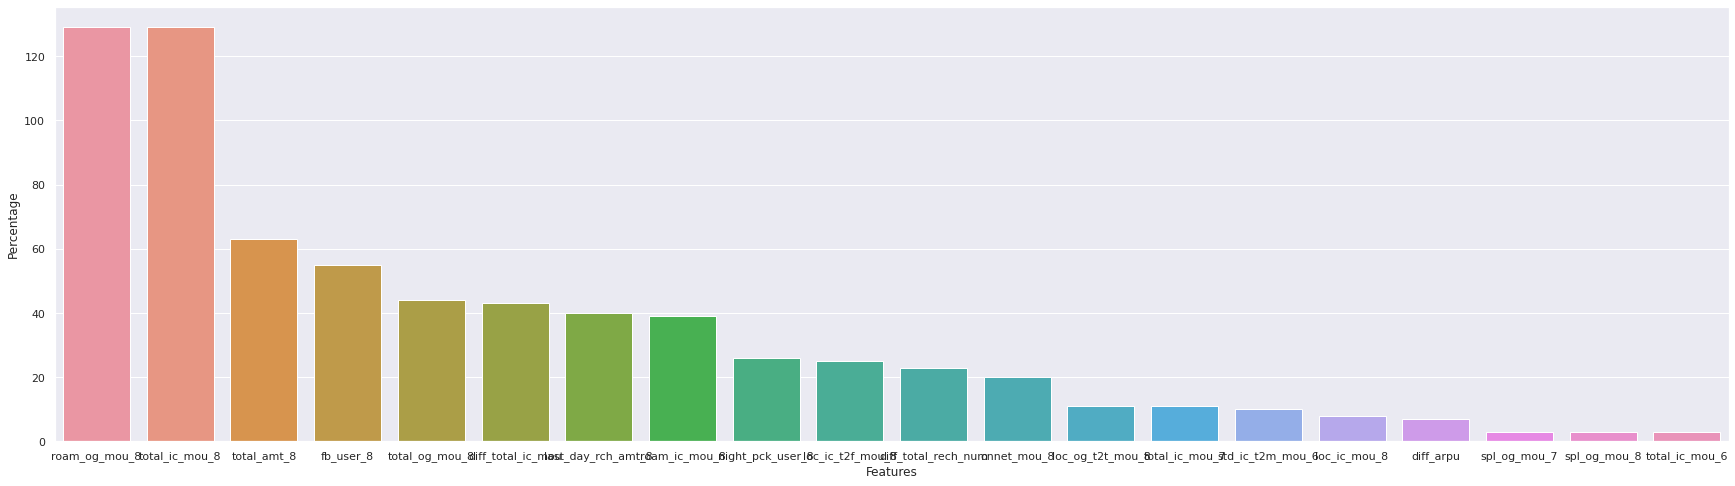

In [144]:
plt.figure(figsize=(30,8))
x_axis_values = [i[0] for i in top_20_features_gbdt]
y_axis_values = [j[1] for j in top_20_features_gbdt]
sns.barplot(x= x_axis_values,y= y_axis_values)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

**Results: The below are the results when tuned hyperparameters are applied to a GBDT using the SMOTE dataset**
1. Accuracy= 86.8
2. Sensitivity/Recall = 80.49
3. Specificity = 87.36
4. The top 5 features that have contributed on the model are:
roam_og_mou>>total_ic_mou_8>>total_amt_8>>fb_user_8>>total_og_mou_8


## 3.7 **Decision Trees**
Now we will use Decision Trees to build the model. We will be using unbalanced dataset and then balance the model using class_weight parameter and also the SMOTE transformed dataset to train model

### 3.7.1 **Decision Trees on Imbalanced Dataset balanced internally using class_weight**

We will use GridSearchCV to perform the cross validation task as well as hyperparameter tuning and then we will find out the best hyperparameter combination from the Grid Search CV out from the combination formed by the max_depth and min_sample_split values provided. And then we will finally build a model.

In [145]:
%%time
dt_model = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})
parameters = {'max_depth': range(1,20,2), 'min_samples_split': [5, 10, 15, 20, 25, 50, 100]}
clf_decision_trees = GridSearchCV(dt_model, parameters, cv=4, scoring='roc_auc',return_train_score=True, n_jobs=-1)
clf_decision_trees.fit(X_train, y_train)

CPU times: user 2.55 s, sys: 174 ms, total: 2.72 s
Wall time: 4min 40s


In [146]:
pd.DataFrame(clf_decision_trees.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

mean_test_score                                \
param_max_depth                      1         3         5         7    
param_min_samples_split                                                 
5                              0.762923  0.869087  0.878884  0.844612   
10                             0.762923  0.869087  0.878239  0.845760   
15                             0.762923  0.869087  0.878425  0.843970   
20                             0.762923  0.869087  0.878883  0.844784   
25                             0.762923  0.869087  0.878968  0.846441   
50                             0.762923  0.869087  0.882398  0.854374   
100                            0.762923  0.869087  0.884490  0.861792   

                                                                           \
param_max_depth                9         11        13        15        17   
param_min_samples_split                                                     
5                        0.797437  0.770001  0.744830  0.731150  0.714018   
10                       0.795864  0.767554  0.750787  0.734941  0.720987   
15                       0.802209  0.774520  0.757981  0.745792  0.732222   
20                       0.800122  0.778989  0.762553  0.750083  0.739147   
25                       0.804599  0.780676  0.767610  0.757144  0.745122   
50                       0.819925  0.799019  0.789423  0.783274  0.772643   
100                      0.839814  0.826671  0.817736  0.817012  0.809727   

                                  mean_train_score                      \
param_max_depth                19               1         3         5    
param_min_samples_split                                                  
5                        0.702819         0.766169  0.880952  0.922018   
10                       0.714310         0.766169  0.880952  0.922018   
15                       0.721952         0.766169  0.880952  0.921976   
20                       0.728199         0.766169  0.880952  0.921859   
25                       0.731413         0.766169  0.880952  0.921859   
50                       0.768381         0.766169  0.880952  0.921471   
100                      0.809090         0.766169  0.880952  0.921213   

                                                                           \
param_max_depth                7         9         11        13        15   
param_min_samples_split                                                     
5                        0.946783  0.965005  0.975278  0.982156  0.986465   
10                       0.946431  0.964041  0.973671  0.980289  0.984275   
15                       0.945984  0.962625  0.972110  0.978088  0.982121   
20                       0.945563  0.961747  0.970477  0.976526  0.980462   
25                       0.945207  0.961052  0.969465  0.975334  0.979130   
50                       0.943762  0.958638  0.966270  0.971660  0.974763   
100                      0.941896  0.954254  0.961123  0.965388  0.968055   

                                             
param_max_depth                17        19  
param_min_samples_split                      
5                        0.989298  0.991696  
10                       0.987258  0.990027  
15                       0.985080  0.987797  
20                       0.983368  0.985881  
25                       0.982030  0.984329  
50                       0.977237  0.979304  
100                      0.970184  0.971683

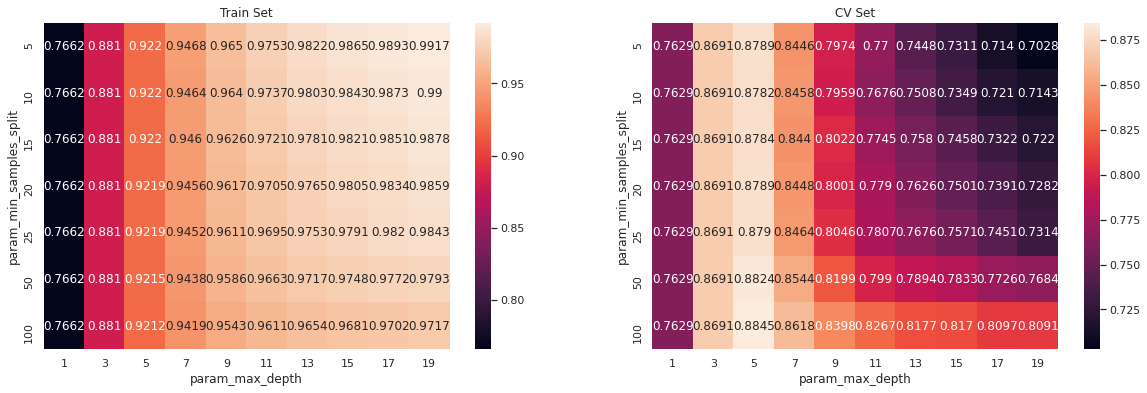

In [147]:
import seaborn as sns; 
sns.set()
max_scores1 = pd.DataFrame(clf_decision_trees.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

0.893


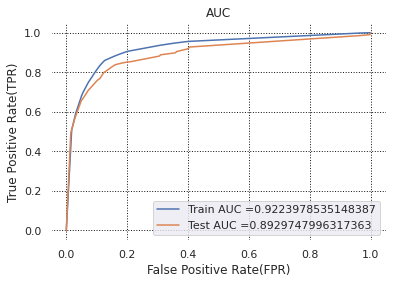

In [148]:
dt_bestModel = DecisionTreeClassifier(class_weight = 'balanced', max_depth=5, min_samples_split=50)
dt_bestModel.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_dt=dt_bestModel.predict_proba(X_train)[:,1]

y_test_pred_dt=dt_bestModel.predict_proba(X_test)[:,1]

train_fpr_dt, train_tpr_dt, tr_thresholds_dt = roc_curve(y_train, y_train_pred_dt)
test_fpr_dt, test_tpr_dt, te_thresholds_dt = roc_curve(y_test, y_test_pred_dt)

ax = plt.subplot()

auc_train_dt=auc(train_fpr_dt, train_tpr_dt)
auc_test_dt=auc(test_fpr_dt, test_tpr_dt)
print(round(auc_test_dt,4))

ax.plot(train_fpr_dt, train_tpr_dt, label="Train AUC ="+str(auc_train_dt))
ax.plot(test_fpr_dt, test_tpr_dt, label="Test AUC ="+str(auc_test_dt))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [149]:
pred_probs_test_dt = dt_bestModel.predict_proba(X_test)[:,1]
print('The roc-auc score for the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_dt))

The roc-auc score for the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:


'0.89'

In [150]:
pred_accuracy_test_dt = dt_bestModel.predict(X_test)[:]
confusion_matrix_dt = metrics.confusion_matrix(y_test, pred_accuracy_test_dt)

In [151]:
print('The confusion matrix of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:')
confusion_matrix_dt

The confusion matrix of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:


array([[5999,  892],
       [ 119,  491]])

In [152]:
print('The accuracy score of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.3}".format(metrics.accuracy_score(y_test, pred_accuracy_test_dt))

The accuracy score of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:


'0.865'

In [153]:
sensitivity_dt, specificity_dt, support_dt = sensitivity_specificity_support(y_test, pred_accuracy_test_dt, average='binary')

In [154]:
print('The sensitivity of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.3}".format(sensitivity_dt)

'0.805'

In [155]:
print('The specificity of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.3}".format(specificity_dt)

'0.871'

In [227]:
print("The train confusion matrix of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:")
pred_accuracy_train_dt = dt_bestModel.predict(X_train)[:]
confusion_matrix_dt_train = metrics.confusion_matrix(y_train, pred_accuracy_train_dt)
confusion_matrix_dt_train

The train confusion matrix of the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:


array([[18054,  2615],
       [  256,  1575]])

Train confusion matrix
[[18054  2615]
 [  256  1575]]


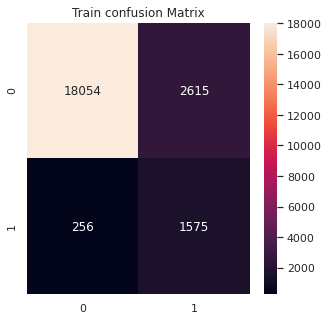

Test confusion matrix
[[6020  871]
 [ 119  491]]


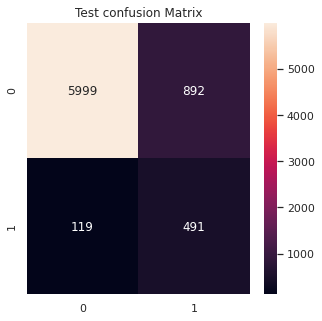

In [228]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_dt_train)
sns.heatmap(pd.DataFrame(confusion_matrix_dt_train),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_gbdt_test)
sns.heatmap(pd.DataFrame(confusion_matrix_dt),annot=True, fmt='g')
plt.show()

In [156]:
important_features=dt_bestModel.feature_importances_

In [157]:
mapping_feature_importance={}
for i,j in enumerate(X.columns):
  if(important_features[i]!=0.0):
    mapping_feature_importance[j]=round(important_features[i]*100,4)

In [158]:
print('The top 20 features and their respecteive contribution in percentage are:')
top_20_features_dt = sorted(mapping_feature_importance.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_features_dt

The top 20 features and their respecteive contribution in percentage are:


[('total_ic_mou_8', 59.3974),
 ('roam_og_mou_8', 10.5607),
 ('total_amt_8', 6.5956),
 ('fb_user_8', 6.2091),
 ('std_og_mou_7', 3.1406),
 ('last_day_rch_amt_8', 2.4367),
 ('diff_total_ic_mou', 2.1128),
 ('total_og_mou_8', 1.7045),
 ('diff_total_rech_num', 1.4582),
 ('roam_og_mou_7', 0.9948),
 ('diff_std_og_mou', 0.6323),
 ('loc_og_t2f_mou_7', 0.5778),
 ('arpu_7', 0.5355),
 ('diff_roam_og_mou', 0.5325),
 ('loc_ic_t2m_mou_8', 0.5146),
 ('diff_std_ic_mou', 0.5094),
 ('isd_ic_mou_7', 0.4806),
 ('max_rech_data_7', 0.4617),
 ('spl_og_mou_7', 0.4452),
 ('diff_onnet_mou', 0.2358)]

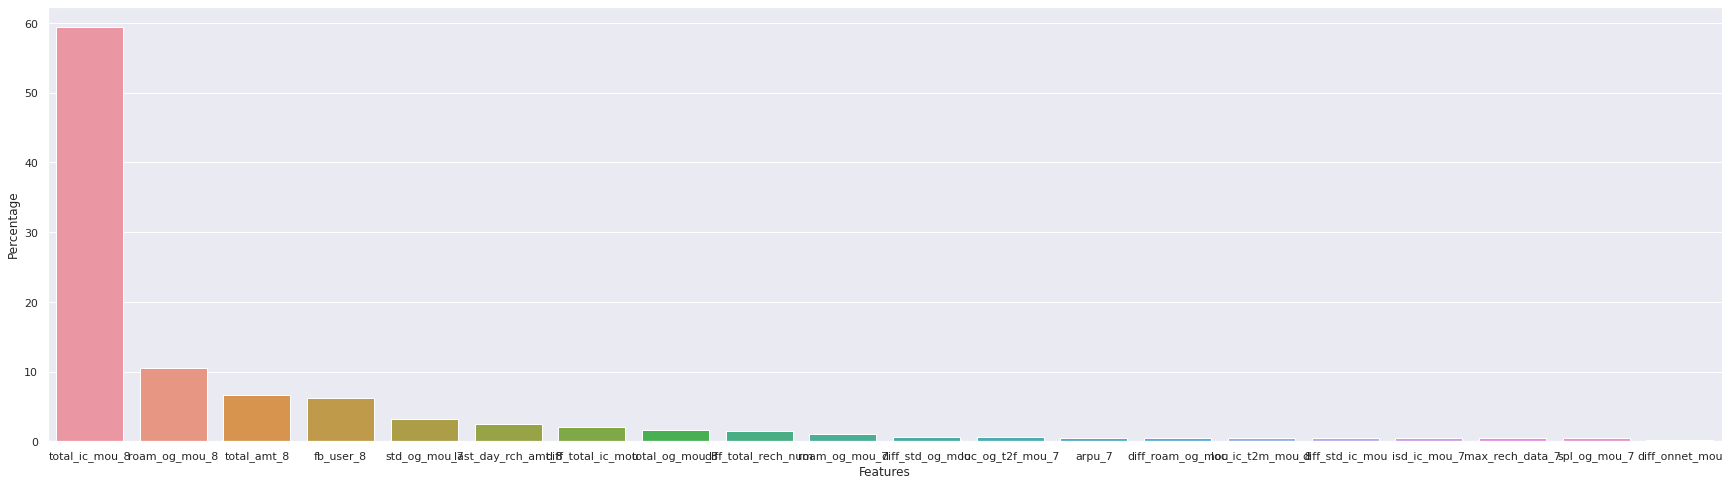

In [159]:
plt.figure(figsize=(30,8))
x_axis_values = [i[0] for i in top_20_features_dt]
y_axis_values = [j[1] for j in top_20_features_dt]
sns.barplot(x= x_axis_values,y= y_axis_values)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

**Results: The below are the results when tuned hyperparameters are applied to a Decision Trees using the imbalanced dataset balanced internally using class_weights**
1. Accuracy= 86.5%
2. Sensitivity/Recall = 80.5%
3. Specificity = 87.1
4. The top 5 features that have contributed on the model are:
      total_ic_mou_8>>roam_og_mou8>>total_amt_8>>fb_user_8>>std_og_mou_7


### 3.7.2 **Decision Trees on SMOTE dataset**

We will perform the same step that we use to perform in the previous modeling that perform hyperparameter tuning using GridSearchCV and then find out the best hyperparameter based on the results of the GridSearchCV.
  Based on the hyperparameter value retreived we will then build a model and then find out the corresponding roc-auc, accuracy, specificity and sensitivity

In [160]:
%%time
dt_model_smote = DecisionTreeClassifier()
parameters = {'max_depth': range(1,20,2), 'min_samples_split': [5, 10, 15, 20, 25, 50, 100]}
clf_decision_trees_smote = GridSearchCV(dt_model_smote, parameters, cv=4, scoring='roc_auc',return_train_score=True, n_jobs=-1)
clf_decision_trees_smote.fit(X_train_smote, y_train_smote)

CPU times: user 6.45 s, sys: 158 ms, total: 6.6 s
Wall time: 10min 49s


In [161]:
pd.DataFrame(clf_decision_trees_smote.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

mean_test_score                                \
param_max_depth                      1         3         5         7    
param_min_samples_split                                                 
5                              0.786637  0.912038  0.937745  0.943687   
10                             0.786637  0.912038  0.937689  0.944415   
15                             0.786637  0.912038  0.937677  0.945248   
20                             0.786637  0.912038  0.937685  0.945310   
25                             0.786637  0.912038  0.937726  0.945485   
50                             0.786637  0.912038  0.937906  0.946196   
100                            0.786637  0.912038  0.937916  0.946748   

                                                                           \
param_max_depth                9         11        13        15        17   
param_min_samples_split                                                     
5                        0.938790  0.926746  0.912085  0.907485  0.903867   
10                       0.940266  0.929499  0.919137  0.912726  0.913970   
15                       0.943201  0.936001  0.926829  0.921178  0.921531   
20                       0.945282  0.939957  0.932077  0.927102  0.926554   
25                       0.947038  0.941840  0.937487  0.932647  0.931092   
50                       0.950515  0.949865  0.946153  0.942015  0.941962   
100                      0.951763  0.952295  0.950571  0.948176  0.948445   

                                  mean_train_score                      \
param_max_depth                19               1         3         5    
param_min_samples_split                                                  
5                        0.901989         0.786637  0.913735  0.942873   
10                       0.910805         0.786637  0.913735  0.942873   
15                       0.919939         0.786637  0.913735  0.942873   
20                       0.925878         0.786637  0.913735  0.942873   
25                       0.929505         0.786637  0.913735  0.942873   
50                       0.940837         0.786637  0.913735  0.942786   
100                      0.947529         0.786637  0.913735  0.942763   

                                                                           \
param_max_depth                7         9         11        13        15   
param_min_samples_split                                                     
5                        0.958605  0.972471  0.982363  0.988530  0.992033   
10                       0.958486  0.972022  0.981630  0.987775  0.991249   
15                       0.958385  0.971522  0.980734  0.986896  0.990400   
20                       0.958276  0.971049  0.979968  0.986035  0.989793   
25                       0.958202  0.970724  0.979307  0.985201  0.988808   
50                       0.957795  0.969025  0.976520  0.981895  0.985551   
100                      0.956961  0.966677  0.972701  0.977025  0.979988   

                                             
param_max_depth                17        19  
param_min_samples_split                      
5                        0.994663  0.995983  
10                       0.994011  0.995365  
15                       0.993199  0.994537  
20                       0.992511  0.993813  
25                       0.991673  0.992979  
50                       0.988259  0.989637  
100                      0.982373  0.983840

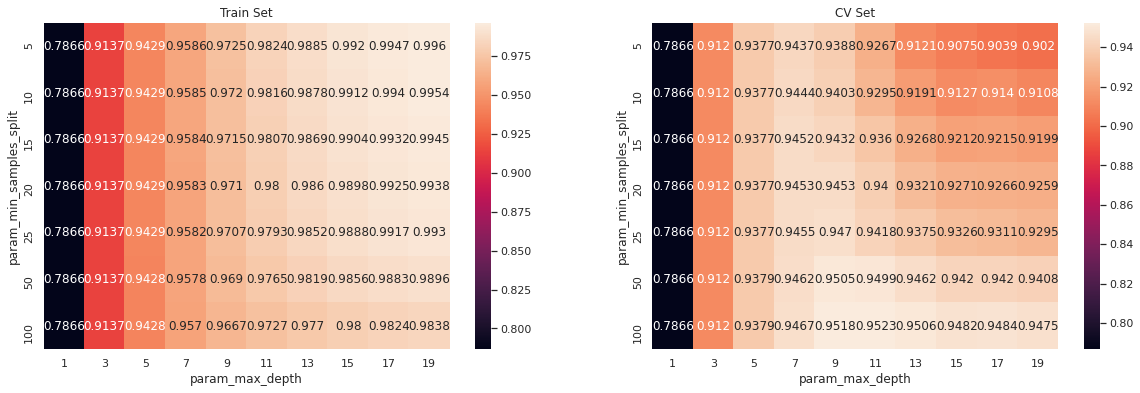

In [162]:
import seaborn as sns; 
sns.set()
max_scores1 = pd.DataFrame(clf_decision_trees_smote.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

0.8958


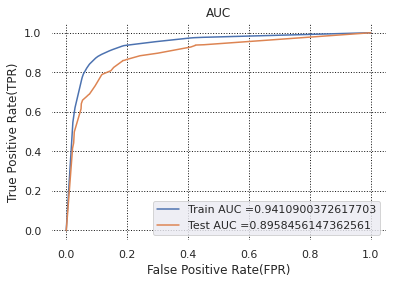

In [163]:
dt_bestModel_smote = DecisionTreeClassifier(max_depth=5, min_samples_split=100, class_weight='balanced')
dt_bestModel_smote.fit(X_train_smote, y_train_smote)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_dt_smote=dt_bestModel_smote.predict_proba(X_train_smote)[:,1]

y_test_pred_dt_smote=dt_bestModel_smote.predict_proba(X_test)[:,1]

train_fpr_dt_smote, train_tpr_dt_smote, tr_thresholds_dt_smote = roc_curve(y_train_smote, y_train_pred_dt_smote)
test_fpr_dt_smote, test_tpr_dt_smote, te_thresholds_dt_smote = roc_curve(y_test, y_test_pred_dt_smote)

ax = plt.subplot()

auc_train_dt_smote=auc(train_fpr_dt_smote, train_tpr_dt_smote)
auc_test_dt_smote=auc(test_fpr_dt_smote, test_tpr_dt_smote)
print(round(auc_test_dt_smote,4))

ax.plot(train_fpr_dt_smote, train_tpr_dt_smote, label="Train AUC ="+str(auc_train_dt_smote))
ax.plot(test_fpr_dt_smote, test_tpr_dt_smote, label="Test AUC ="+str(auc_test_dt_smote))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [164]:
pred_probs_test_dt_smote = dt_bestModel_smote.predict_proba(X_test)[:,1]
print('The roc-auc score for the Decision Tree model on SMOTE dataset is:')
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_dt_smote))

The roc-auc score for the Decision Tree model on SMOTE dataset is:


'0.9'

In [165]:
pred_accuracy_test_dt_smote = dt_bestModel_smote.predict(X_test)[:]
confusion_matrix_dt_smote = metrics.confusion_matrix(y_test, pred_accuracy_test_dt_smote)

In [166]:
print('The confusion matrix of the Decision Tree model on SMOTE dataset is:')
confusion_matrix_dt_smote

The confusion matrix of the Decision Tree model on SMOTE dataset is:


array([[6182,  709],
       [ 151,  459]])

In [167]:
print('The accuracy of the Decision Tree model on SMOTE dataset is:')
"{:2.3}".format(metrics.accuracy_score(y_test, pred_accuracy_test_dt_smote))

The accuracy of the Decision Tree model on SMOTE dataset is:


'0.885'

In [168]:
sensitivity_dt_smote, specificity_dt_smote, support_dt_smote = sensitivity_specificity_support(y_test, pred_accuracy_test_dt_smote, average='binary')

In [169]:
print('The sensitivity of the Decision Tree model on SMOTE dataset is:')
"{:2.3}".format(sensitivity_dt_smote)

The sensitivity of the Decision Tree model on SMOTE dataset is:


'0.752'

In [170]:
print('The specificity of the Decision Tree model on SMOTE dataset is:')
"{:2.3}".format(specificity_dt_smote)

The specificity of the Decision Tree model on SMOTE dataset is:


'0.897'

In [229]:
print("The train confusion matrix of the Decision Tree model on SMOTE is:")
pred_accuracy_train_dt_smote = dt_bestModel_smote.predict(X_train)[:]
confusion_matrix_dt_train_smote = metrics.confusion_matrix(y_train, pred_accuracy_train_dt_smote)
confusion_matrix_dt_train_smote

The train confusion matrix of the Decision Tree model on SMOTE is:


array([[18526,  2143],
       [  447,  1384]])

Train confusion matrix
[[18054  2615]
 [  256  1575]]


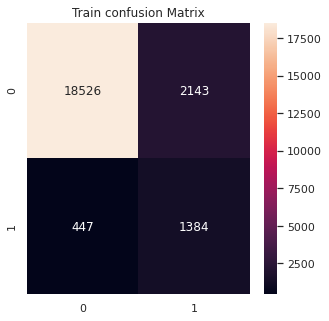

Test confusion matrix
[[6182  709]
 [ 151  459]]


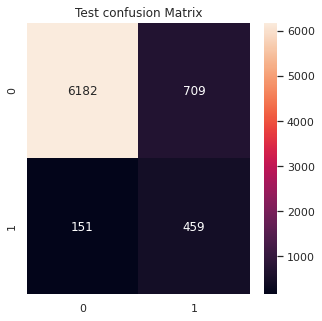

In [231]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_dt_train)
sns.heatmap(pd.DataFrame(confusion_matrix_dt_train_smote),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_dt_smote)
sns.heatmap(pd.DataFrame(confusion_matrix_dt_smote),annot=True, fmt='g')
plt.show()

In [232]:
important_features_smote=dt_bestModel_smote.feature_importances_

In [233]:
mapping_feature_importance_smote={}
for i,j in enumerate(X.columns):
  if(important_features_smote[i]!=0.0):
    mapping_feature_importance_smote[j]=round(important_features_smote[i]*100,4)

In [234]:
print('The top 20 features and their respective contribution in percentage are:')
top_20_features_dt_smote = sorted(mapping_feature_importance_smote.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_features_dt_smote

The top 20 features and their respective contribution in percentage are:


[('total_amt_8', 52.2978),
 ('roam_og_mou_8', 24.7969),
 ('total_ic_mou_8', 10.5316),
 ('last_day_rch_amt_8', 1.9707),
 ('fb_user_8', 1.8204),
 ('diff_total_ic_mou', 1.6619),
 ('roam_ic_mou_8', 1.3521),
 ('night_pck_user_8', 1.0266),
 ('std_ic_t2m_mou_6', 0.8983),
 ('diff_total_rech_num', 0.6815),
 ('onnet_mou_8', 0.6653),
 ('max_rech_data_8', 0.6006),
 ('spl_og_mou_8', 0.461),
 ('loc_ic_t2m_mou_8', 0.4376),
 ('diff_max_rech_amt', 0.2347),
 ('total_rech_num_6', 0.1878),
 ('total_og_mou_8', 0.1744),
 ('std_og_t2t_mou_7', 0.1168),
 ('std_ic_t2t_mou_7', 0.0841)]

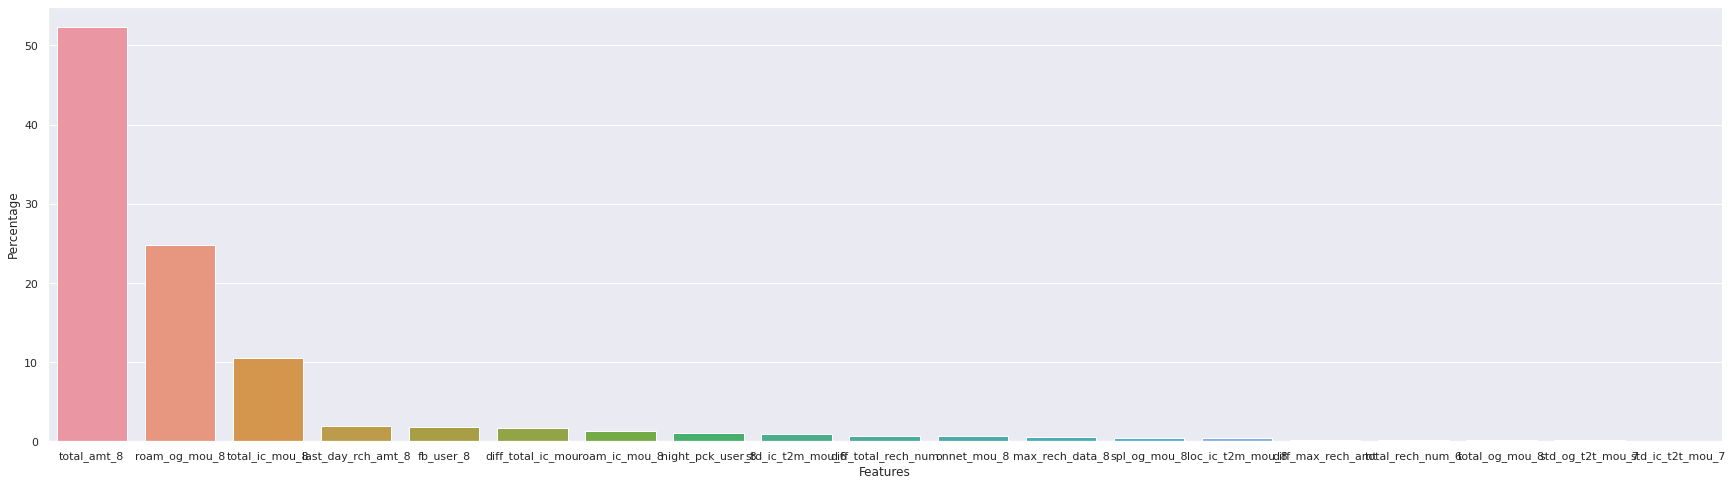

In [235]:
plt.figure(figsize=(30,8))
x_axis_values = [i[0] for i in top_20_features_dt_smote]
y_axis_values = [j[1] for j in top_20_features_dt_smote]
sns.barplot(x= x_axis_values,y= y_axis_values)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

**Results: The below are the results when tuned hyperparameters are applied to a GBDT using the SMOTE dataset**
1. Accuracy= 88.5%
2. Sensitivity/Recall = 75.2%
3. Specificity = 89.7
4. The top 5 features that have contributed on the model are:
total_amt_8>>roam_og_mou_8>> total_ic_mou_8>> last_day_rch_amt_8>> fb_user_8


## 3.8 **Random Forest**
Now we will use Random Forest to build the model. We will be using imbalanced dataset and then balance the model using class_weight parameter and also the SMOTE transformed dataset to train model

### 3.8.1 **Random Forest on Imbalanced Dataset balanced internally using class_weight**

We will use GridSearchCV to perform the cross validation task as well as hyperparameter tuning and then we will find out the best hyperparameter combination from the Grid Search CV out from the combination formed by the criterion and max_features values provided. And then we will finally build a model.

In [176]:
%%time
rf_model = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
parameters = {'n_estimators': range(5,80,5), 'max_depth': range(5, 60, 5)}
clf_random_forest = GridSearchCV(rf_model, parameters, cv=4, scoring='roc_auc',return_train_score=True, n_jobs=-1)
clf_random_forest.fit(X_train, y_train)

CPU times: user 11.5 s, sys: 306 ms, total: 11.8 s
Wall time: 31min 42s


In [187]:
pd.DataFrame(clf_random_forest.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

mean_test_score                                          \
param_max_depth                 5         10        15        20        25   
param_n_estimators                                                           
5                         0.909999  0.879012  0.838886  0.835526  0.831619   
10                        0.916002  0.906988  0.881165  0.873868  0.871807   
15                        0.914161  0.913526  0.899586  0.889026  0.883756   
20                        0.921819  0.916536  0.904584  0.900660  0.901719   
25                        0.918831  0.919474  0.912317  0.901479  0.904892   
30                        0.921412  0.921972  0.914575  0.908097  0.908632   
35                        0.920869  0.921146  0.917851  0.913155  0.913260   
40                        0.921336  0.924384  0.917036  0.914874  0.912374   
45                        0.921599  0.922454  0.923268  0.913545  0.916151   
50                        0.921878  0.923393  0.919275  0.915174  0.917149   
55                        0.921496  0.924801  0.919973  0.921008  0.914668   
60                        0.921021  0.924622  0.922883  0.919788  0.917766   
65                        0.922350  0.924633  0.919804  0.922835  0.921135   
70                        0.922613  0.924502  0.922926  0.923221  0.917926   
75                        0.921715  0.926587  0.921189  0.920744  0.922886   

                                                                      \
param_max_depth           30        35        40        45        50   
param_n_estimators                                                     
5                   0.836246  0.829200  0.842372  0.837704  0.833104   
10                  0.875092  0.872425  0.874678  0.873847  0.876014   
15                  0.888988  0.887399  0.885358  0.893668  0.889305   
20                  0.900026  0.896569  0.903172  0.898476  0.901077   
25                  0.904266  0.902711  0.905978  0.902640  0.903539   
30                  0.909485  0.908353  0.908113  0.912529  0.909971   
35                  0.910134  0.915233  0.910336  0.910535  0.916505   
40                  0.916424  0.911536  0.912660  0.913363  0.911057   
45                  0.914757  0.914433  0.917027  0.915711  0.914420   
50                  0.916186  0.914336  0.913545  0.914962  0.917420   
55                  0.919029  0.916218  0.920225  0.920154  0.916136   
60                  0.919609  0.917223  0.918476  0.919544  0.919861   
65                  0.919416  0.918387  0.920208  0.919664  0.918446   
70                  0.917939  0.919191  0.922168  0.918735  0.922381   
75                  0.921114  0.921154  0.922046  0.920159  0.922233   

                             mean_train_score                                \
param_max_depth           55               5         10        15        20   
param_n_estimators                                                            
5                   0.832347         0.929250  0.975531  0.991825  0.995473   
10                  0.876983         0.934049  0.982530  0.994609  0.997798   
15                  0.894436         0.935390  0.984288  0.995175  0.998430   
20                  0.896253         0.938244  0.985658  0.995362  0.998528   
25                  0.900705         0.937244  0.985986  0.995572  0.998421   
30                  0.911503         0.939056  0.986393  0.995677  0.998765   
35                  0.912907         0.938939  0.986733  0.996010  0.998807   
40                  0.916308         0.939637  0.986510  0.996338  0.998877   
45                  0.914607         0.939172  0.986551  0.996168  0.998755   
50                  0.917124         0.940151  0.987002  0.995940  0.998856   
55                  0.917055         0.940015  0.987072  0.996050  0.998954   
60                  0.916185         0.939823  0.986823  0.996130  0.998885   
65                  0.919105         0.941108  0.987278  0.995961  0.998993   
70                  0.919832         0.940662  0.9870

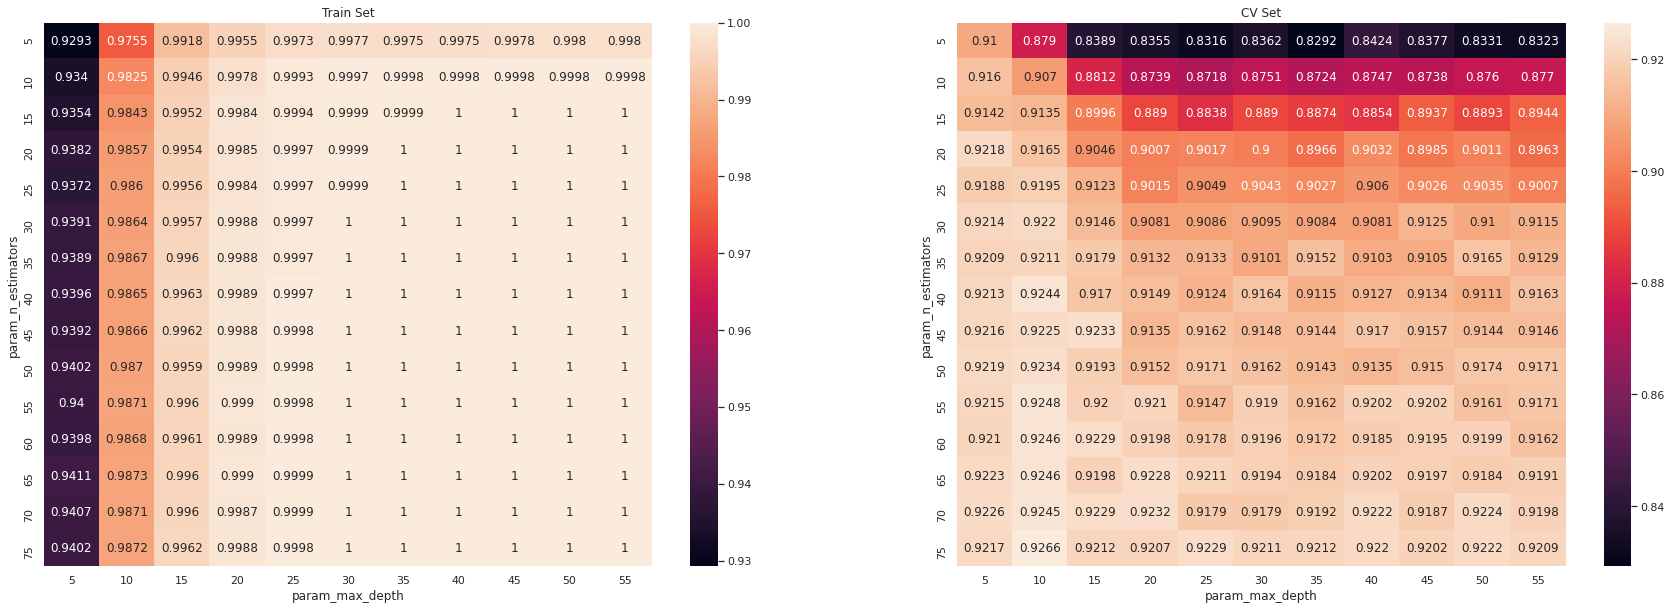

In [188]:
import seaborn as sns; 
sns.set()
max_scores1 = pd.DataFrame(clf_random_forest.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

0.9234


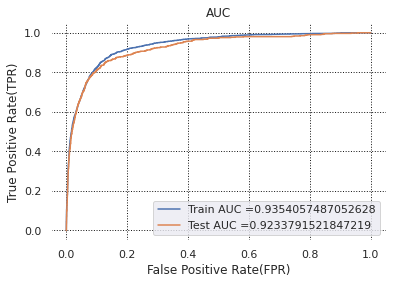

In [189]:
rf_bestModel = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_estimators=50, max_depth=5)
rf_bestModel.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_rf=rf_bestModel.predict_proba(X_train)[:,1]

y_test_pred_rf=rf_bestModel.predict_proba(X_test)[:,1]

train_fpr_rf, train_tpr_rf, tr_thresholds_rf = roc_curve(y_train, y_train_pred_rf)
test_fpr_rf, test_tpr_rf, te_thresholds_rf = roc_curve(y_test, y_test_pred_rf)

ax = plt.subplot()

auc_train_rf=auc(train_fpr_rf, train_tpr_rf)
auc_test_rf=auc(test_fpr_rf, test_tpr_rf)
print(round(auc_test_rf,4))

ax.plot(train_fpr_rf, train_tpr_rf, label="Train AUC ="+str(auc_train_rf))
ax.plot(test_fpr_rf, test_tpr_rf, label="Test AUC ="+str(auc_test_rf))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [190]:
pred_probs_test_rf = rf_bestModel.predict_proba(X_test)[:,1]
print('The roc-auc score for the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_rf))

The roc-auc score for the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:


'0.92'

In [191]:
pred_accuracy_test_rf = rf_bestModel.predict(X_test)[:]
confusion_matrix_rf_test = metrics.confusion_matrix(y_test, pred_accuracy_test_rf)

In [192]:
print('The confusion matrix of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:')
confusion_matrix_rf_test

The confusion matrix of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:


array([[6392,  499],
       [ 145,  465]])

In [193]:
print('The accuracy score of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.3}".format(metrics.accuracy_score(y_test, pred_accuracy_test_rf))

The accuracy score of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:


'0.914'

In [194]:
sensitivity_rf, specificity_rf, support_rf = sensitivity_specificity_support(y_test, pred_accuracy_test_rf, average='binary')

In [195]:
print('The sensitivity of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.3}".format(sensitivity_rf)

The sensitivity of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:


'0.762'

In [196]:
print('The specificity of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.3}".format(specificity_rf)

The specificity of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:


'0.928'

In [197]:
pred_accuracy_train_rf = rf_bestModel.predict(X_train)[:]
confusion_matrix_rf_train = metrics.confusion_matrix(y_train, pred_accuracy_train_rf)

In [198]:
print('The train confusion matrix of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:')
confusion_matrix_rf_train

The train confusion matrix of the Random Forest model on imbalanced dataset(balanced internally using class_weight) is:


array([[19049,  1620],
       [  400,  1431]])

Train confusion matrix
[[19049  1620]
 [  400  1431]]


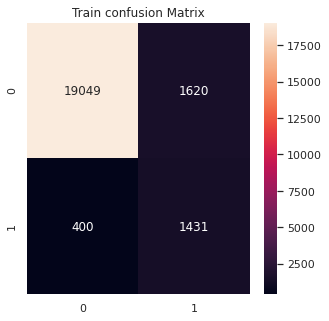

Test confusion matrix
[[6392  499]
 [ 145  465]]


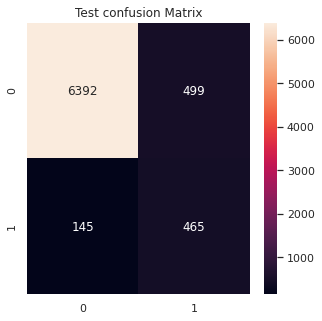

In [237]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_rf_train)
sns.heatmap(pd.DataFrame(confusion_matrix_rf_train),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_rf_test)
sns.heatmap(pd.DataFrame(confusion_matrix_rf_test),annot=True, fmt='g')
plt.show()

In [238]:
important_features_smote=dt_bestModel_smote.feature_importances_

In [239]:
important_features_rf=rf_bestModel.feature_importances_

In [240]:
mapping_feature_importance_rf={}
for i,j in enumerate(X.columns):
  if(important_features_rf[i]!=0.0):
    mapping_feature_importance_rf[j]=round(important_features_rf[i]*100,4)

**Top 20 features in Random Forest along with plot**

In [241]:
print('The top 20 features for random forest and their respecteive contribution in percentage are:')
top_20_features_rf = sorted(mapping_feature_importance_rf.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_features_rf

The top 20 features for random forest and their respecteive contribution in percentage are:


[('total_ic_mou_8', 10.2903),
 ('total_og_mou_8', 9.3659),
 ('total_amt_8', 7.0108),
 ('last_day_rch_amt_8', 5.6927),
 ('diff_arpu', 4.9649),
 ('diff_total_rech_amt', 4.911),
 ('roam_og_mou_8', 4.6755),
 ('arpu_8', 3.9161),
 ('roam_ic_mou_8', 3.83),
 ('loc_ic_mou_8', 3.1639),
 ('max_rech_amt_8', 2.8913),
 ('loc_og_mou_8', 2.7639),
 ('loc_og_t2m_mou_8', 2.2559),
 ('diff_total_rech_num', 2.1825),
 ('diff_total_og_mou', 1.9486),
 ('diff_roam_og_mou', 1.7547),
 ('diff_roam_ic_mou', 1.7435),
 ('fb_user_8', 1.7141),
 ('diff_total_ic_mou', 1.6846),
 ('night_pck_user_8', 1.6139)]

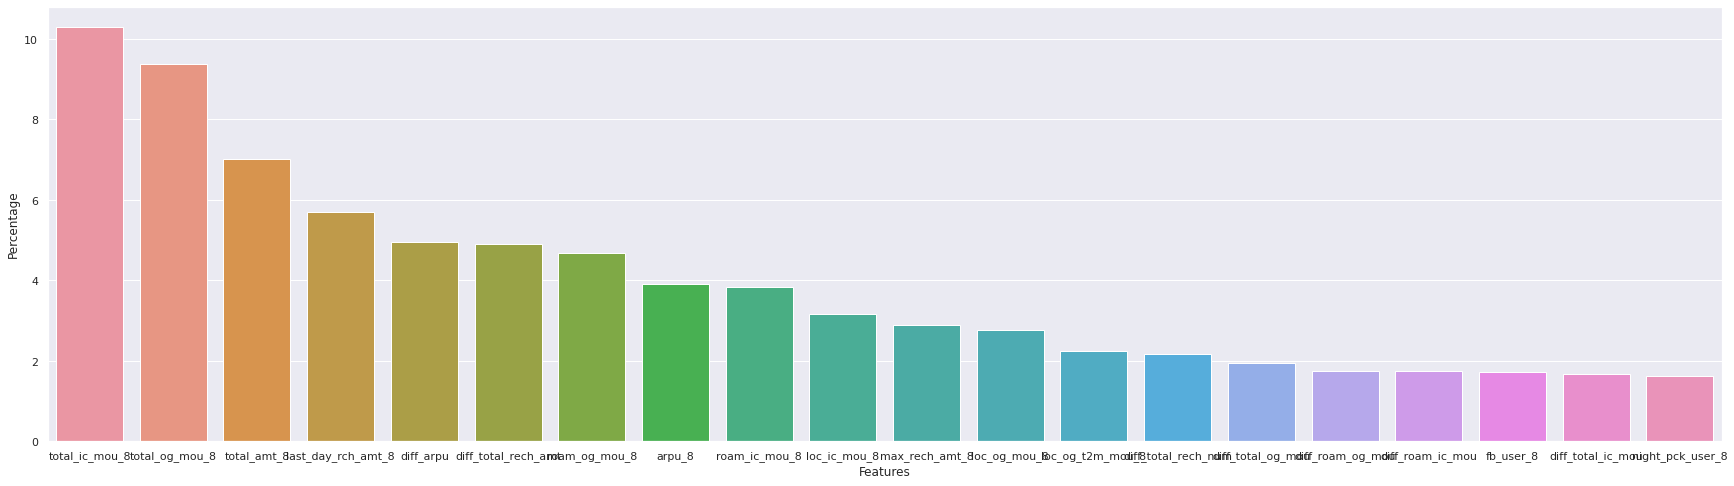

In [242]:
plt.figure(figsize=(30,8))
x_axis_values = [i[0] for i in top_20_features_rf]
y_axis_values = [j[1] for j in top_20_features_rf]
sns.barplot(x= x_axis_values,y= y_axis_values)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

**Results: The below are the results when tuned hyperparameters are applied to a Random Forest on the imbalanced dataset balanced internally using class_weight:**
1. Accuracy= 91.4
2. Sensitivity/Recall = 76.2
3. Specificity = 92.8
4. The top 5 features that have contributed on the model are:
total_ic_mou>> total_og_mou_8>> total_amt_8>> last_day_rch_amt_8>> diff_arpu


### 3.7.2 **Random Forest on SMOTE dataset**

We will perform the same step that we use to perform in the previous modeling that perform hyperparameter tuning using GridSearchCV and then find out the best hyperparameter based on the results of the GridSearchCV.
  Based on the hyperparameter value retreived we will then build a model and then find out the corresponding roc-auc, accuracy, specificity and sensitivity

In [203]:
%%time
rf_model_smote = RandomForestClassifier()
parameters = {'n_estimators': range(5,80,10), 'max_depth': range(5, 60, 10)}
clf_random_forest_smote = GridSearchCV(rf_model_smote, parameters, cv=4, scoring='roc_auc',return_train_score=True, n_jobs=-1)
clf_random_forest_smote.fit(X_train_smote, y_train_smote)

CPU times: user 26.5 s, sys: 163 ms, total: 26.7 s
Wall time: 20min 10s


In [204]:
pd.DataFrame(clf_random_forest_smote.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

mean_test_score                                          \
param_max_depth                 5         15        25        35        45   
param_n_estimators                                                           
5                         0.947652  0.980789  0.980496  0.980759  0.981276   
15                        0.952403  0.988154  0.990384  0.990624  0.990540   
25                        0.952679  0.989261  0.991981  0.992006  0.991965   
35                        0.953710  0.990070  0.992646  0.992795  0.992696   
45                        0.954038  0.990025  0.992785  0.992759  0.992743   
55                        0.953851  0.990529  0.993005  0.993194  0.993183   
65                        0.954068  0.990832  0.993123  0.993339  0.993385   
75                        0.954435  0.990644  0.993333  0.993525  0.993364   

                             mean_train_score                                \
param_max_depth           55               5         15        25        35   
param_n_estimators                                                            
5                   0.980271         0.950120  0.997772  0.999641  0.999638   
15                  0.990027         0.955067  0.999180  0.999988  0.999998   
25                  0.992164         0.955561  0.999313  0.999993  1.000000   
35                  0.992483         0.956309  0.999422  0.999998  1.000000   
45                  0.992793         0.956658  0.999411  0.999998  1.000000   
55                  0.992996         0.956778  0.999440  0.999999  1.000000   
65                  0.993241         0.956934  0.999497  0.999999  1.000000   
75                  0.993396         0.957009  0.999461  0.999999  1.000000   

                                        
param_max_depth           45        55  
param_n_estimators                      
5                   0.999687  0.999656  
15                  0.999996  0.999998  
25                  1.000000  1.000000  
35                  1.000000  1.000000  
45                  1.000000  1.000000  
55                  1.000000  1.000000  
65                  1.000000  1.000000  
75                  1.000000  1.000000

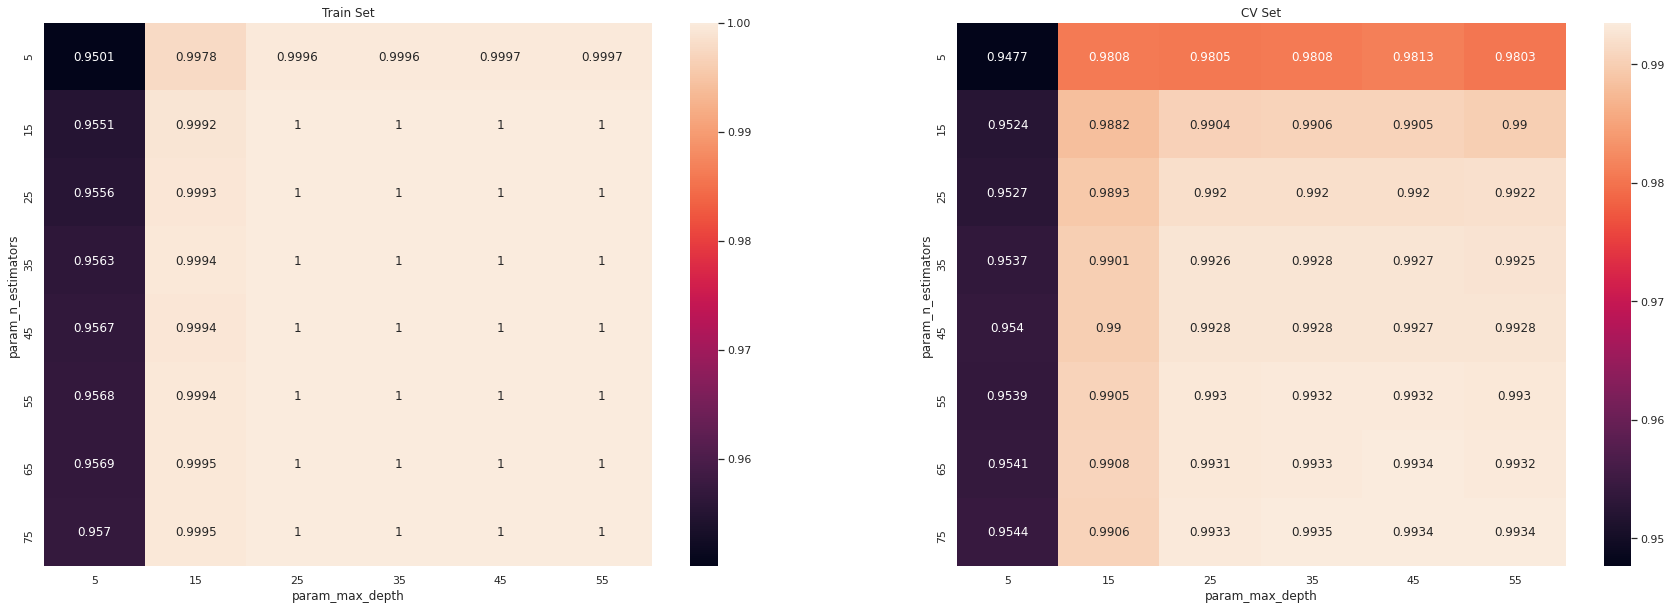

In [205]:
import seaborn as sns; 
sns.set()
max_scores1 = pd.DataFrame(clf_random_forest_smote.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()\
[['mean_test_score','mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

0.9276


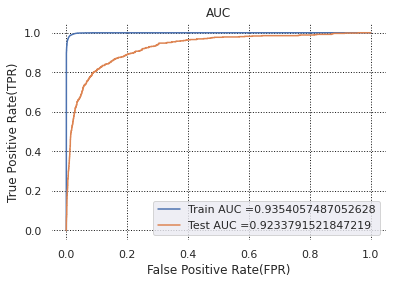

In [206]:
rf_bestModel_smote = RandomForestClassifier(n_estimators=75, max_depth=25, max_features='sqrt', min_samples_leaf=5, min_samples_split=3)
rf_bestModel_smote.fit(X_train_smote, y_train_smote)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_rf_smote=rf_bestModel_smote.predict_proba(X_train_smote)[:,1]

y_test_pred_rf_smote=rf_bestModel_smote.predict_proba(X_test)[:,1]

train_fpr_rf_smote, train_tpr_rf_smote, tr_thresholds_rf_smote = roc_curve(y_train_smote, y_train_pred_rf_smote)
test_fpr_rf_smote, test_tpr_rf_smote, te_thresholds_rf_smote = roc_curve(y_test, y_test_pred_rf_smote)

ax = plt.subplot()

auc_train_rf_smote=auc(train_fpr_rf_smote, train_tpr_rf_smote)
auc_test_rf_smote=auc(test_fpr_rf_smote, test_tpr_rf_smote)
print(round(auc_test_rf_smote,4))

ax.plot(train_fpr_rf_smote, train_tpr_rf_smote, label="Train AUC ="+str(auc_train_rf))
ax.plot(test_fpr_rf_smote, test_tpr_rf_smote, label="Test AUC ="+str(auc_test_rf))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()

In [207]:
pred_probs_test_rf_smote = rf_bestModel_smote.predict_proba(X_test)[:,1]
print('The roc-auc score for the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:')
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_rf_smote))

The roc-auc score for the Decision Tree model on imbalanced dataset(balanced internally using class_weight) is:


'0.93'

In [208]:
pred_accuracy_test_rf_smote = rf_bestModel_smote.predict(X_test)[:]
confusion_matrix_rf_test_smote = metrics.confusion_matrix(y_test, pred_accuracy_test_rf_smote)

In [210]:
print('The test confusion matrix of the Random Forest model on SMOTE dataset is:')
confusion_matrix_rf_test_smote

The test confusion matrix of the Random Forest model on SMOTE dataset is:


array([[6580,  311],
       [ 200,  410]])

In [213]:
print('The accuracy score of the Random Forest model on SMOTE dataset is:')
"{:2.3}".format(metrics.accuracy_score(y_test, pred_accuracy_test_rf_smote))

The accuracy score of the Random Forest model on SMOTE dataset is:


'0.932'

In [216]:
sensitivity_rf_smote, specificity_rf_smote, support_rf_smote = sensitivity_specificity_support(y_test, pred_accuracy_test_rf_smote, average='binary')

In [217]:
print('The sensitivity of the Random Forest model on SMOTE dataset is:')
"{:2.3}".format(sensitivity_rf_smote)

The sensitivity of the Random Forest model on SMOTE dataset is:


'0.672'

In [218]:
print('The specificity of the Random Forest model on SMOTE dataset is:')
"{:2.3}".format(specificity_rf_smote)

The specificity of the Random Forest model on SMOTE dataset is:


'0.955'

In [219]:
pred_accuracy_train_rf_smote = rf_bestModel_smote.predict(X_train_smote)[:]
confusion_matrix_rf_train_smote = metrics.confusion_matrix(y_train_smote, pred_accuracy_train_rf_smote)

In [220]:
print('The train confusion matrix of the Random Forest model on SMOTE dataset is:')
confusion_matrix_rf_train_smote

The train confusion matrix of the Random Forest model on SMOTE dataset is:


array([[20234,   435],
       [  169, 20500]])

Train confusion matrix
[[20234   435]
 [  169 20500]]


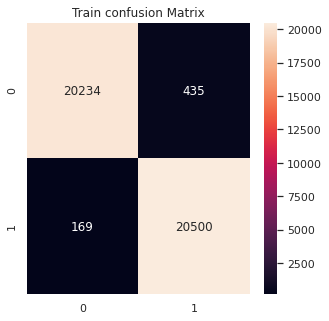

Test confusion matrix
[[6580  311]
 [ 200  410]]


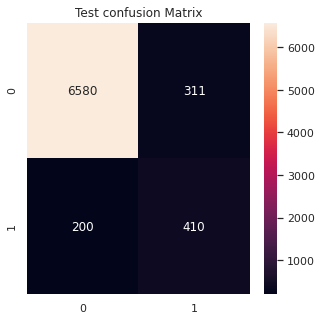

In [243]:
print("Train confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Train confusion Matrix')
print(confusion_matrix_rf_train_smote)
sns.heatmap(pd.DataFrame(confusion_matrix_rf_train_smote),annot=True, fmt='g')
plt.show()
print("Test confusion matrix")
plt.figure(figsize=(5,5))
plt.title('Test confusion Matrix')
print(confusion_matrix_rf_test_smote)
sns.heatmap(pd.DataFrame(confusion_matrix_rf_test_smote),annot=True, fmt='g')
plt.show()

In [221]:
important_features_rf_smote=rf_bestModel_smote.feature_importances_

In [222]:
mapping_feature_importance_rf_smote={}
for i,j in enumerate(X.columns):
  if(important_features_rf_smote[i]!=0.0):
    mapping_feature_importance_rf_smote[j]=round(important_features_rf_smote[i]*100,4)

**Top 20 features in Random Forest with SMOTE dataset along with plot**

In [223]:
print('The top 20 features for random forest and their respecteive contribution in percentage are:')
top_20_features_rf_smote = sorted(mapping_feature_importance_rf_smote.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_features_rf_smote

The top 20 features for random forest and their respecteive contribution in percentage are:


[('roam_ic_mou_8', 6.9744),
 ('total_amt_8', 6.3811),
 ('roam_og_mou_8', 6.3642),
 ('total_ic_mou_8', 5.6525),
 ('arpu_8', 3.8111),
 ('total_og_mou_8', 3.7734),
 ('max_rech_amt_8', 3.2397),
 ('diff_arpu', 2.6817),
 ('diff_roam_og_mou', 2.5445),
 ('loc_og_t2m_mou_8', 2.5085),
 ('diff_total_rech_amt', 2.4266),
 ('night_pck_user_8', 2.26),
 ('last_day_rch_amt_8', 2.1926),
 ('fb_user_8', 2.0156),
 ('diff_roam_ic_mou', 1.9984),
 ('total_rech_num_8', 1.8835),
 ('diff_total_ic_mou', 1.5969),
 ('loc_ic_mou_8', 1.4135),
 ('diff_total_rech_num', 1.2802),
 ('loc_og_mou_8', 1.2011)]

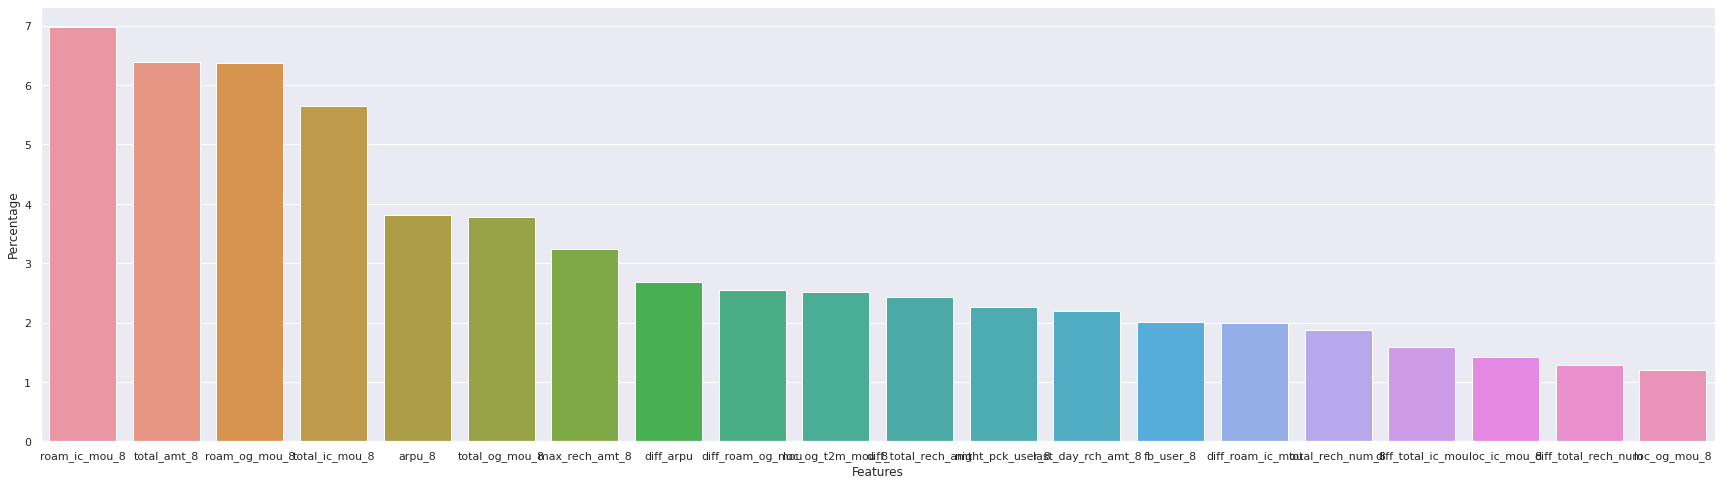

In [224]:
plt.figure(figsize=(30,8))
x_axis_values = [i[0] for i in top_20_features_rf_smote]
y_axis_values = [j[1] for j in top_20_features_rf_smote]
sns.barplot(x= x_axis_values,y= y_axis_values)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()

**Results: The below are the results when tuned hyperparameters are applied to a Random Forest on the SMOTE dataset:**
1. Accuracy= 93.2%
2. Sensitivity/Recall = 67.2%
3. Specificity = 95.5%
4. The top 5 features that have contributed on the model are:
roam_ic_mou_8>>total_amt_8>>roam_og_mou_8>>total_ic_mou_8>>arpu_8


In [131]:
table = PrettyTable()

table.field_names = ["Model", "Dataset", "Balancing Technique Used","Test Accuracy", "Test Recall", "Test Specificity"]


table.add_row(["Logistic Regression Base Model", "PCA Transformed", "class_weight","84.19 %", "80.2 %", "84.5%"])
table.add_row(["Logistic Regression Base Model", "PCA Transformed", "SMOTE","81.67 %", "82.5 %", "82.5%"])
table.add_row(["Logistic Regression Hypertuned Model", "PCA Transformed", "class_weight","84.1 %", "80.16 %", "84.44%"])
table.add_row(["Logistic Regression Hypertuned Model", "PCA Transformed", "SMOTE","81.18 %", "82.62 %", "81.05%"])
table.add_row(["GBDT Hypertuned Model", "Original Dataset", "SMOTE","86.8 %", "80.49 %", "87.36%"])
table.add_row(["Decision Trees Hypertuned Model", "Original Dataset", "class_weight","86.5 %", "80.5 %", "87.1%"])
table.add_row(["Decision Trees Hypertuned Model", "Original Dataset", "SMOTE","88.5 %", "75.2 %", "89.7%"])
table.add_row(["Random Forest Hypertuned Model", "Original Dataset", "class_weight","91.4 %", "76.2 %", "92.8 %"])
table.add_row(["Random Forest Hypertuned Model", "Original Dataset", "SMOTE","93.2 %", "67.2 %", "95.5%"])

print(table)

+--------------------------------------+------------------+--------------------------+---------------+-------------+------------------+
|                Model                 |     Dataset      | Balancing Technique Used | Test Accuracy | Test Recall | Test Specificity |
+--------------------------------------+------------------+--------------------------+---------------+-------------+------------------+
|    Logistic Regression Base Model    | PCA Transformed  |       class_weight       |    84.19 %    |    80.2 %   |      84.5%       |
|    Logistic Regression Base Model    | PCA Transformed  |          SMOTE           |    81.67 %    |    82.5 %   |      82.5%       |
| Logistic Regression Hypertuned Model | PCA Transformed  |       class_weight       |     84.1 %    |   80.16 %   |      84.44%      |
| Logistic Regression Hypertuned Model | PCA Transformed  |          SMOTE           |    81.18 %    |   82.62 %   |      81.05%      |
|        GBDT Hypertuned Model         | Origina